In [1]:
!pip install openpyxl

In [1]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
import optuna

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

C:\Users\hp\AppData\Roaming\Python\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pandas as pd

# Load the dataset
file_path = 'dashboard_data.xlsx'
data_dashboard = pd.read_excel(file_path)

# Display the first few rows of the dataset
data_dashboard

Date de remplissage de la fiche    Date de naissance Niveau d'etude  \
0                          3/11/0019  1999-09-01 00:00:00    Pas Précisé   
1                          3/21/0019  1978-02-04 00:00:00  Universitaire   
2                1977-12-25 00:00:00  1977-12-25 00:00:00     Secondaire   
3                1986-02-06 00:00:00  1986-02-06 00:00:00     Secondaire   
4                1988-05-20 00:00:00  1988-05-20 00:00:00    Pas Précisé   
...                              ...                  ...            ...   
1910             2019-05-06 00:00:00  1982-03-06 00:00:00  Universitaire   
1911             2019-12-09 00:00:00  1991-04-20 00:00:00     Secondaire   
1912             2019-12-06 00:00:00  1997-01-12 00:00:00     Secondaire   
1913             2019-05-15 00:00:00  1991-05-05 00:00:00  Universitaire   
1914             2019-05-08 00:00:00  1993-01-02 00:00:00  Universitaire   

      Genre  Taille  Poids Situation Matrimoniale (SM)  \
0     Homme     NaN    NaN                 Célibataire   
1     Homme     NaN    NaN                   Marié (e)   
2     Femme     NaN    NaN                   Marié (e)   
3     Homme     NaN    NaN                 Célibataire   
4     Homme     NaN    NaN                 Célibataire   
...     ...     ...    ...                         ...   
1910  Homme     NaN    NaN                 Célibataire   
1911  Homme     NaN    NaN                 Célibataire   
1912  Homme     NaN    NaN                 Célibataire   
1913  Homme     NaN    NaN                 Célibataire   
1914  Homme     NaN    NaN                 Célibataire   

                      Profession Arrondissement de résidence  \
0                   Chaudronnier                    Douala 3   
1           Secrétaire comptable       Douala (Non précisé )   
2                 Commerçant (e)       Douala (Non précisé )   
3                Homme d’affaire                    Douala 5   
4                     Beat Maker       Douala (Non précisé )   
...                          ...                         ...   
1910                       R A S                    Douala 5   
1911                    HOTELIER                    Douala 2   
1912              Commerçant (e)                    Douala 3   
1913      TECHNICIEN GENIE CIVIL                    Douala 5   
1914  ELECTRICIEN INSTRUMENTISTE       Douala (Non précisé )   

     Quartier de Résidence  ...  \
0                  Logbaba  ...   
1              NDOGPASSI 2  ...   
2                    Dakar  ...   
3                  NGANGUE  ...   
4                   Douala  ...   
...                    ...  ...   
1910               NDOGBOM  ...   
1911              NEW BELL  ...   
1912                 YASSA  ...   
1913               BEPANDA  ...   
1914                 R A S  ...   

     Raison de non-eligibilité totale [Porteur(HIV,hbs,hcv)]  \
0                                                   NaN        
1                                                   NaN        
2                                                   NaN        
3                                                   NaN        
4                                                   NaN        
...                                                 ...        
1910                                                NaN        
1911                                                NaN        
1912                                                NaN        
1913                                                NaN        
1914                                                Non        

     Raison de non-eligibilité totale [Opéré]  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                         NaN   
4                                         NaN   
...                                       ...   
1910                                      NaN   
1911                                      Na

In [3]:
import pandas as pd

# Load the dataset
file_path = 'ml_data_2019.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataset
data

ID  Age Horodateur Niveau_d'etude Genre_  Taille_  Poids  \
0     DONOR_1842   24    46:44.9  Universitaire  Homme      NaN    NaN   
1     DONOR_1843   23    44:19.0  Universitaire  Homme      NaN    NaN   
2     DONOR_1844   41    46:54.3          Aucun  Homme      NaN    NaN   
3     DONOR_1845   24    29:29.7  Universitaire  Homme      NaN    NaN   
4     DONOR_1846   30    47:47.4     Secondaire  Homme      NaN    NaN   
...          ...  ...        ...            ...    ...      ...    ...   
1841  DONOR_3683   26    31:07.0     Secondaire  Homme      NaN    NaN   
1842  DONOR_3684   23    29:02.4     Secondaire  Homme      NaN    NaN   
1843  DONOR_3685   30    33:42.3  Universitaire  Homme      NaN    NaN   
1844  DONOR_3686   28    02:54.5    Pas Précisé  Femme      NaN   96.0   
1845  DONOR_3687   29    56:38.9    Pas Précisé  Homme      NaN    NaN   

     Situation_Matrimoniale_(SM)           Profession_  \
0                    Célibataire          Etudiant (e)   
1                    Célibataire          Sans Emplois   
2                      Marié (e)             Tailleur    
3                    Célibataire              Etudiant   
4                    Célibataire             Militaire   
...                          ...                   ...   
1841                 Célibataire                 Élève   
1842                 Célibataire                Élève    
1843                 Célibataire  Technicien superieur   
1844                 Célibataire           Estheticien   
1845                 Célibataire           Électricien   

     Arrondissement_de_résidence_  ...  \
0                        Douala 3  ...   
1                           R A S  ...   
2                        Douala 1  ...   
3                        Douala 5  ...   
4           Douala (Non précisé )  ...   
...                           ...  ...   
1841                     Douala 3  ...   
1842        Douala (Non précisé )  ...   
1843        Douala (Non précisé )  ...   
1844        Douala (Non précisé )  ...   
1845                     Douala 3  ...   

     Raison_de_non-eligibilité_totale__[Porteur(HIV,hbs,hcv)]  \
0                                                   NaN         
1                                                   Non         
2                                                   Non         
3                                                   NaN         
4                                                   NaN         
...                                                 ...         
1841                                                NaN         
1842                                                NaN         
1843                                                NaN         
1844                                                NaN         
1845                                                NaN         

     Raison_de_non-eligibilité_totale__[Opéré]  \
0                                          NaN   
1                                          Oui   
2                                          Non   
3                                          NaN   
4                                          NaN   
...                                        ...   
1841                                       NaN   
1842                                       NaN   
1843                                       NaN   
1844                                       NaN   
1845                                       NaN   

     Raison_de_non-eligibilité_totale__[Drepanocytaire]  \
0                                                   NaN   
1                                                   Non   
2                                                   Non   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
1841                                                NaN   
1842                                                NaN   
1843      

In [4]:
# Correct the transformation using the exact labels present in the dataset
# data['ÉLIGIBILITÉ_AU_DON.'] = data['ÉLIGIBILITÉ_AU_DON.'].replace({
#     'Temporairement Non-eligible': 'Non eligible',
#     'Définitivement non-eligible': 'Non eligible'
# })

# Verify the transformation
data['ÉLIGIBILITÉ_AU_DON.'].unique()

array(['Eligible', 'Définitivement non-eligible',
       'Temporairement Non-eligible'], dtype=object)

In [5]:
# Display the column names of the dataset
data.columns.tolist()

['ID',
 'Age',
 'Horodateur',
 "Niveau_d'etude",
 'Genre_',
 'Taille_',
 'Poids',
 'Situation_Matrimoniale_(SM)',
 'Profession_',
 'Arrondissement_de_résidence_',
 'Quartier_de_Résidence_',
 'Nationalité_',
 'Religion_',
 'A-t-il_(elle)_déjà_donné_le_sang_',
 'Si_oui_preciser_la_date_du_dernier_don._',
 'Taux_d’hémoglobine_',
 'ÉLIGIBILITÉ_AU_DON.',
 'Raison_indisponibilité__[Est_sous_anti-biothérapie__]',
 'Raison_indisponibilité__[Taux_d’hémoglobine_bas_]',
 'Raison_indisponibilité__[date_de_dernier_Don_<_3_mois_]',
 'Raison_indisponibilité__[IST_récente_(Exclu_VIH,_Hbs,_Hcv)]',
 'Date_de_dernières_règles_(DDR)__',
 'Raison_de_l’indisponibilité_de_la_femme_[La_DDR_est_mauvais_si_<14_jour_avant_le_don]',
 'Raison_de_l’indisponibilité_de_la_femme_[Allaitement_]',
 'Raison_de_l’indisponibilité_de_la_femme_[A_accoucher_ces_6_derniers_mois__]',
 'Raison_de_l’indisponibilité_de_la_femme_[Interruption_de_grossesse__ces_06_derniers_mois]',
 'Raison_de_l’indisponibilité_de_la_femme_[est_encei

In [4]:
# Function to inspect unique values in each column
def inspect_unique_values(df):
    unique_values_dict = {}
    for column in df.columns:
        unique_values = df[column].unique()
        unique_values_dict[column] = unique_values
    return unique_values_dict

# Inspect unique values in each column
unique_values_dict = inspect_unique_values(data)
unique_values_dict

{'ID': array(['DONOR_1842', 'DONOR_1843', 'DONOR_1844', ..., 'DONOR_3685',
        'DONOR_3686', 'DONOR_3687'], shape=(1846,), dtype=object),
 'Age': array([24, 23, 41, 30, 28, 34, 31, 22, 32, 27, 21, 29, 26, 37, 45, 35, 49,
        51, 46, 33, 25, 19, 44,  0, 36, 20, 40, 42, 38, 43, 39, 48, 52, 55,
        47, 62, 50, 56, 53, 57,  1, 18, 54, 16, 60, 59, 58, 17, 13, 63, 12]),
 'Horodateur': array(['46:44.9', '44:19.0', '46:54.3', ..., '33:42.3', '02:54.5',
        '56:38.9'], shape=(1802,), dtype=object),
 "Niveau_d'etude": array(['Universitaire', 'Aucun', 'Secondaire', 'Primaire', 'Pas Précisé'],
       dtype=object),
 'Genre_': array(['Homme', 'Femme'], dtype=object),
 'Taille_': array([ nan, 175., 184., 167., 170., 164., 182., 177., 172., 178., 163.,
        168., 169., 180., 162., 187., 173., 176., 174., 158., 165., 160.,
        192., 185., 183.]),
 'Poids': array([ nan,  55.,  69.,  83.,  82.,  68.,  74.,  90.,  70.,  85.,  75.,
         88.,  72.,  60.,  86.,  76.,  63.,  98.,  

In [5]:
# Inspect unique values in the specified columns
columns_to_inspect = [
    "Niveau_d'etude", 'Profession_', 'Arrondissement_de_résidence_',
    'Quartier_de_Résidence_', 'Religion_', 'Nationalité_'
]

unique_values_specific = {column: data[column].unique() for column in columns_to_inspect}
unique_values_specific

{"Niveau_d'etude": array(['Universitaire', 'Aucun', 'Secondaire', 'Primaire', 'Pas Précisé'],
       dtype=object),
 'Profession_': array(['Etudiant (e)', 'Sans Emplois', 'Tailleur ', 'Etudiant',
        'Militaire', 'Bijoutier', 'Couturier', 'Jeune cadre',
        'Commerçant (e)', 'Mototaximan', 'Agent commercial', 'Elève',
        'Chauffeur', 'COIFFEUSE', 'Mécanicien', 'Cultuvateur',
        "Agent d'exploitation", 'Fonctionnaires', 'Marin', 'Infirmièr',
        'Élève ', 'Sportifs', 'Chargé de clientèle', 'MENUISIER ',
        'Pas precise', 'CONTROLEUR DES DOUANES', 'Electronicien',
        'Électricien', 'Élève', 'Conducteur', 'Security officer',
        'BUSINESMAN', 'Plombier', 'Footballeur', 'Agent de securite',
        'Technicien supérieur d’agriculture', 'Vigil', 'Moto taximan',
        'Cuisinier', 'ELECTRICIEN', 'Agent de securité', 'Enseignant (e)',
        'Secrétaire comptable', 'Angent de securité', 'Pasteur', 'S1p',
        "Contractuel d'administration", 'Logistici

In [6]:
# Function to standardize values in specified columns
def standardize_column_values(df, column, mapping):
    return df[column].replace(mapping)



In [9]:
professions_mapping = {
    'Agent de securite': 'Agent de sécurité',
    'Angent de securité': 'Agent de sécurité',
    'Agent de securité': 'Agent de sécurité',
    'ARGENT DE SÉCURITÉ ': 'Agent de sécurité',
    'Agent de sécurité hgoped': 'Agent de sécurité',
    'Agent Sécurité': 'Agent de sécurité',
    'ANGENT COMMUNALE': 'Agent communal',
    'agent communal': 'Agent communal',
    'Agent Commercial': 'Agent commercial',
    'ARGENT COMMERCIAL': 'Agent commercial',
    'Infirmièr': 'Infirmier',
    'Etudiant (e)': 'Étudiant',
    'Etudiant': 'Étudiant',
    'Sans Emplois': 'Sans emploi',
    'COIFFEUSE': 'Coiffeuse',
    'MENUISIER ': 'Menuisier',
    'ELECTRICIEN': 'Électricien',
    'Élève ': 'Élève',
    'Eleve': 'Élève',
    'pas précisé': 'Pas précisé',
    'Pas precise': 'Pas précisé',
    'AGENT TECHNIQUE': 'Agent technique',
    'CHAUDRONIER': 'Chaudronnier',
    'MARIN': 'Marin',
    'ADMINISTRATEUR DES HOPITAUX': 'Administrateur des hôpitaux',
    'ASSISTANT DE  DIRECTION': 'Assistant de direction',
    'STAGIAIRE': 'Stagiaire',
    'Électronicien ': 'Électronicien',
    'MECANICIEN': 'Mécanicien',
    'FORREUR': 'Forreur',
    'MENUSIER': 'Menuisier',
    'Tolier': 'Tôlier',
    'Etudiant': 'Étudiant',
    'CONTROLEUR DES DOUANES': 'Controleur des douanes',
    'Vigil': 'Agent de sécurité',
    'Mototaximan': 'Moto taximan',
    'MENUSIER ': 'Menuisier',
    'coiffeuse': 'Coiffeuse',
    'chauffeur': 'Chauffeur',
    'CHAUFFEUR': 'Chauffeur',
    'agent de sécurité': 'Agent de sécurité',
    'TECHNICIEN TOPO': 'Technicien topo',
    'CHAUDRONNIER': 'Chaudronnier',
    'IMPRIMEUR': 'Imprimeur',
    'VENDEUSE': 'Vendeuse',
    'Pâtissier ': 'Pâtissier',
    'AGENT DE SÉCURITÉ': 'Agent de sécurité',
    'Charger de la sécurité': 'Agent de sécurité',
    'ELEVE': 'Élève',
    'OUVRIER': 'Ouvrier',
    'DEBROUILLARD': 'Débrouillard',
    'Soudeur ': 'Soudeur',
    'élève': 'Élève',
    'INFORMATICIEN DE RESEAU': 'Informaticien de réseau',
    'Agent de maintenance indusyrielle': 'Agent de maintenance industrielle',
    'DOCKER': 'Docker',
    'CABLEUR': 'Cableur',
    'BOULANGER': 'Boulanger',
    'cadre commercial': 'Cadre commercial',
    'Electrotechnicien': 'Électrotechnicien',
    'Technicien ': 'Technicien',
    'Dolker ': 'Docker',
    'Ingénieur réseaux télécoms': 'Ingénieur réseaux et telecom',
    'Médecin ': 'Médecin',
    "AGENT D'APPUI": "Agent d'appui",
    'Eleve ': 'Élève',
    "AGENT D'ENTRETIEN": "Agent d'entretien",
    'MÉCANICIEN ': 'Mécanicien',
    'CARRELEUR': 'Carreleur',
    'Employé de banque ': 'Employé de banque',
    'PASTEUR': 'Pasteur',
    'Doker': 'Docker',
    'MAGASINIER': 'Magasinier',
    'FEMME AU FOYER': 'Femme au foyer',
    'COIFFEUR': 'Coiffeur',
    'STUCKOWLOVE': 'Stuckowlove',
    'VITRIER': 'Vitrier',
    'Conseille agropastoral': 'Conseiller agropastoral',
    'ANGENT COMMUNALE ': 'Agent communal',
    'Doker': 'Docker',
    'Declarante en Douane': 'Déclarante en douane',
    'GEOMETRE': 'Géomètre',
    'gestionnaire': 'Gestionnaire',
    'CHAUFEUR': 'Chauffeur',
    "Infor'aticien": "Informaticien",
    'Realisateur': 'Réalisateur',
    'Dessinateur ': 'Dessinateur',
    'EMPLOYE ENTREPRISE': 'Employé',
    'Moto-taximan': 'Moto taximan',
    'NON PRECISE': 'Pas précisé',
    'DIRECTRICE': 'Directrice',
    'brasseur': 'Brasseur',
    'DECLAMANT DOUANE': 'Déclarant douane',
    'MOTO TAXI': 'Moto taximan',
    'agent technique': 'Agent technique',
    'COIFFEURS ': 'Coiffeur',
    'RECEPTIONISTE CAISSIERE': 'Réceptionniste caissière',
    'TECHNICIEN EN BATIMENT': 'Technicien en batiment',
    'Conducteur engin ': "Conducteur d'engin",
    'ASSUREUR': 'Assureur',
    'Technicien gc': 'Technicien en génie civil',
    'Agent immobilier ': 'Agent immobilier',
    'ELECTRO MECANICIEN': 'Électro mécanicien',
    'MANILASON': 'Manilason',
    'Hoteluere': 'Hôtelière',
    'PLANTEUR': 'Planteur',
    'Bensikineur': 'Moto taximan',
    'Maçon ': 'Maçon',
    'Pas précisé ': 'Pas précisé',
    'INGENIEUR BIOTECHNOLOGIE': 'Ingénieur biotechnologie',
    "agent d'entretien": "Agent d'entretien",
    'Electricien ': 'Électricien',
    'Boulanger ': 'Boulanger',
    'Cuisinier ': 'Cuisinier',
    'Employé de banque': 'Employé de banque',
    'Ingénieur agronome ': 'Ingénieur agronome',
    'Ingénieur génie civil ': 'Ingénieur génie civil',
    'Ménagère ': 'Ménagère',
    'Agent de recouvrement ': 'Agent de recouvrement',
    'Agent administratif ': 'Agent administratif',
    'Chargé de communication ': 'Chargé de communication',
    'Chef de sécurité ': 'Chef de sécurité',
    'Analyste programmeur ': 'Analyste-programmeur',
    'Administrateur ': 'Administrateur',
    'Responsable commercial ': 'Responsable commercial',
    'Chargé de clientèle ': 'Chargé de clientèle',
    'Technicien génie civil': 'Technicien en génie civil',
    'Chef comptable ': 'Chef comptable',
    'Plombier ': 'Plombier',
    'Cadre contractuel ': 'Cadre contractuel',
    'Chauffeur ' : 'Chauffeur',
    'Technicien mecanique': 'Technicien mécanique',
    'Ouvrier ': 'Ouvrier',
    'Directeur général ': 'Directeur général',
    'Gestionnaire des ressources humaines': 'Gestionnaire de ressources humaines',
    'Technicien en agriculture ': 'Technicien en agriculture',
    'Assistant administratif ': 'Assistant administratif',
    'Ingénieur logiciel ': 'Ingénieur logiciel',
    'Agent portuaire ': 'Agent portuaire',
    'Soudeur-monteur ': 'Soudeur-monteur',
    'Vendeuse ': 'Vendeuse',
    'Analyste de données ': 'Analyste de données',
    'BUSINESMAN': 'Businessman',
    'médecin': 'Médecin',
    'PEINTRE': 'Peintre',
    'Pas mentionné': 'Pas précisé',
    'Employé (e)  dans une entreprise': 'Employé',
    'Sans emploi ': 'Sans emploi',
    'soudeur': 'Soudeur',
    'Agent de sécurité ': 'Agent de sécurité',
    'Hoteliere': 'Hôtelière',
    'marrin': 'Marin',
    'EDUCATEUR DES ENFANTS': 'Éducateur des enfants',
    'Pas precisé': 'Pas précisé',
    'CHAUFFEUR ': 'Chauffeur',
    'LAVEUR': 'Laveur',
    'COUTURIERE': 'Couturière',
    'AIDE COMPTABLE': 'Aide comptable',
    'APPRENTI TOLERIE ': 'Apprenti tolerie',
    'TECHNICIEN GENIE CIVIL': 'Technicien en génie civil',
    'SOUDEUR': 'Soudeur',
    "AGENT D'APPUI PHARMICIE": "Agent d'appui pharmacie",
    'Intendant ': 'Intendant',
    'Technicien en genie civil': 'Technicien en génie civil',
    'Technicien de génie civile': 'Technicien en génie civil',
    'hoteliere': 'Hôtelière',
    'HOTELIER': 'Hôtelier',
    'AGENT DE SECURITE': 'Agent de sécurité',
    'ELECTRICIEN INSTRUMENTISTE ': 'Électricien instrumentiste',
    'MENAGERE': 'Ménagère',
    'Ingénieur ': 'Ingénieur',
    'Ingenieur': 'Ingénieur',
    'PLOMBIER': 'Plombier',
    'Mnuisier': 'Menuisier',
    'Vendeur ': 'Vendeur',
    'Couturière': 'Couturière',
    'Couturier (e)': 'Couturier',
    'Commerçant (e)': 'Commerçant',
    'Enseignant (e)': 'Enseignant',
    'Personnel de sante': 'Personnel de santé',
    'Analyste -programmeur': 'Analyste-programmeur',
    'Déclarant': 'Déclarant douane',
    'Logisticien transport': 'Logisticien',
    'Coordiste': 'Coordinateur',
    'Administrateur des hôpitaux': 'Administrateur des hôpitaux',
    'Footballeur': 'Footballeur',
    'Chaudronnerie': 'Chaudronnier',
    'Electricien': 'Électricien',
    'photographe': 'Photographe',
    'missionnaire': 'Missionnaire',
    'Estheticien': 'Esthéticien',
    'CASINO': 'Casino',
    'Maintenancier industriel': 'Maintenancier industriel',
    'Decorateur Baptiment': 'Décorateur Baptiment',
    'Ras': 'Pas précisé',
    'Secretaire': 'Secrétaire',
    'Sérigraphie': 'Sérigraphe',
    'Prestataire de service et consultant sportif': 'Prestataire de service et consultant sportif',
    'RAS': 'Pas précisé',
    'Développeur en informatique': 'Développeur en informatique',
    'Laborantin': 'Laborantin',
    'Hotelière': 'Hôtelière',
    'Marrin': 'Marin',
    'Éducateur des enfants': 'Éducateur des enfants',
    'MACHINISTE': 'Machiniste',
    'assureur': 'Assureur',
    'Ingénieur réseaux et telecom': 'Ingénieur réseaux et telecom',
    'constructeur en bâtiment': 'Constructeur en bâtiment',
    'Agent des ressources humaines': 'Agent des ressources humaines',
    'Declarant en Douane': 'Déclarant douane',
    'informaticien': 'Informaticien',
    "conducteurs d'engins genie civil": "Conducteur d'engin",
    'Assistant transit': 'Assistant transit',
    'Contoleur Gestion': 'Contrôleur de gestion',
    'Technicien en Batiment': 'Technicien en batiment',
    'taximan': 'Taximan',
    'Hotelier': 'Hôtelier',
    'Opérateur portique': 'Opérateur portique',
    'Agent sécurité': 'Agent de sécurité',
    'Ingénieur en génie civil': 'Ingénieur génie civil',
    "Technicien d'etancheite": "Technicien d'étanchéité",
    'Trefilleur': 'Tréfileur',
    'Conseillé technique': 'Conseiller technique',
    'Électricien intrumentiste': 'Électricien instrumentiste',
    'Ménusier': 'Menuisier',
    'Déclarant de douane': 'Déclarant douane',
    'Agent de recouvriment': 'Agent de recouvrement',
    'Delegue medical': 'Délégué médical',
    'Maitresse': 'Maîtresse',
    'RESPONSABLE TRANSPORT': 'Responsable transport',
    "Courtier d'assurance": "Courtier d'assurance",
    'Electrotechnicien': 'Électrotechnicien',
    'TAXIMAN': 'Taximan',
    'Technicien de securite': 'Technicien de sécurité',
    'FOOTBALLEUR': 'Footballeur',
    'ELECTRO MECANIQUE NOVAF': 'Électro mécanique NOVAF',
    'INFIRMIER': 'Infirmier',
    'Content manager': 'Content manager',
    'Électrotechnicien': 'Électrotechnicien',
    'comptable': 'Comptable',
    'SOUDRONIER': 'Soudeur',
    'ELECTRICIEN PLOMBIER': 'Électricien plombier',
    'Agent portuaire': 'Agent portuaire',
    'Negoce bois': 'Négoce bois',
    'Electrotechncien': 'Électrotechnicien',
    'INFORMATICIEN': 'Informaticien',
    'EBENISTE': 'Ébéniste',
    'eleve': 'Élève',
    'Hoteliet': 'Hôtelier',
    'Étanchéiste': 'Étanchéiste',
    'Restaurateur': 'Restaurateur',
    'Maitre pecheur': 'Maître pêcheur',
    'Medecin': 'Médecin',
    'GRUTIER': 'Grutier',
    'GESTIONNAIRE': 'Gestionnaire',
    'Assistant magasinier': 'Assistant magasinier',
    'AUDIT COMPTABLE': 'Audit comptable',
    'Commercial-distributeur': 'Commercial-distributeur',
    'Employer de banque': 'Employé de banque',
    'MONITEUR': 'Moniteur',
    'Standardise': 'Standardiste',
    'R A S': 'Pas précisé',
    'ETUDIANT': 'Étudiant',
    'Technicien Staffeur': 'Technicien staffeur',
    'CONSEILLER JURIDIQUE ET FISCAL': 'Conseiller juridique et fiscal',
    'SECURITE': 'Sécurité',
    'HOMME A TOUT FAIRE': 'Homme à tout faire',
    'REGISSEUR SON ET LUMIERE': 'Régisseur son et lumière',
    'MOTO TAXIMAN': 'Moto taximan',
    'Controleur qualité': 'Contrôleur qualité',
    'CONDUCTEUR': 'Conducteur',
    'Assurent': 'Assureur',
    'SCULPTEURS': 'Sculpteur',
    'Sondeur aux brasseries': 'Sondeur aux brasseries',
    'Cadre contractuel': 'Cadre contractuel',
    'Chaudronnerie': 'Chaudronnier',
    'Superviseur maintenance': 'Superviseur maintenance',
    'COUTURIER': 'Couturier',
    'Pas précisée': 'Pas précisé',
    'fiscaliste': 'Fiscaliste',
    'ElEVE': 'Élève',
    'CHANTRE MUSICIEN': 'Chantre musicien',
    'Ingenieur en informatique': 'Ingénieur en informatique',
    'CHEMINOT': 'Cheminot',
    'Mecatronicien nta': 'Mécatronicien',
    'Informatticien': 'Informaticien',
    'Agent de Securité': 'Agent de sécurité',
    'AGENT DE SECURITE': 'Agent de sécurité',
    'Machiniste- Électricien': 'Machiniste-Électricien',
    'Market-developper': 'Market-developper',
    'Ingénieur civil': 'Ingénieur civil',
    'chimiste': 'Chimiste',
    'TECHNICIEN EN FROID ET CLIMATISATION': 'Technicien en froid et climatisation',
    'manoeuvre': 'Manœuvre',
    'assistant administratif': 'Assistant administratif',
    'trader': 'Trader',
    'Ingenieur en bateau': 'Ingénieur en bateau',
    'Stagiaitaire C U D': 'Stagiaire',
    'Électricité': 'Électricien',
    'MANŒUVRE': 'Manœuvre',
    'Cultivateur': 'Cultivateur',
    'Business man': 'Businessman',
    'Conducteur de travaux genie civil': 'Conducteur de travaux génie civil',
    'Macon': 'Maçon',
    'COMPTABLE': 'Comptable',
    'COMPTABLE FINANCIER': 'Comptable financier',
    'Libérale': 'Libérale',
    'COMMUNICATEUR': 'Communicateur',
    'Secrétaire': 'Secrétaire',
    'Mecanicien': 'Mécanicien',
    'Déclarant en douane': 'Déclarant douane',
    'Marqueur des produits pétroliers': 'Marqueur des produits pétroliers',
    'Evangeliste': 'Évangéliste',
    'Missionary': 'Missionnaire',
    'PREPOSE DE MARQUE': 'Préposé de marque',
    'Non precisé': 'Pas précisé',
    'Agent video': 'Agent vidéo',
    'ASSISTANT JURIDIQUE': 'Assistant juridique',
    'Informatien': 'Informaticien',
    'Pas précise': 'Pas précisé',
    'Pointeur': 'Pointeur',
    'agent de propreté': 'Agent de propreté',
    'ARGENT COMMERCIAL': 'Agent commercial',
    'Artisant': 'Artisan',
    'Veterinaire': 'Vétérinaire',
    'FERRAILLEUR': 'Ferrailleur',
    'Responsable commercial': 'Responsable commercial',
    'DECLARANT DOUANE': 'Déclarant douane',
    'Agent immobilier': 'Agent immobilier',
    'Technicien du génie sanitaire': 'Technicien du génie sanitaire',
    'TECHNICIEN': 'Technicien',
    'Agent hse': 'Agent HSE',
    'Technicien Telecom': 'Technicien télécom',
    'Serigraphe': 'Sérigraphe',
    'echaffaudeur': 'Échafaudeur',
    'TECHNICIEN EN AGRICULTURE': 'Technicien en agriculture',
    'Gestionnaire de ressources humaines': 'Gestionnaire de ressources humaines',
    'TECHNICIEN EN METALLURGIE': 'Technicien en métallurgie',
    'HOTELLIER': 'Hôtelier',
    'Controleur': 'Contrôleur',
    "conducteur d'engin": "Conducteur d'engin",
    'Operateur': 'Opérateur',
    'CUISINIER': 'Cuisinier',
    'Emballeuse à palite food': 'Emballeuse à palette food',
    'Chomeur': 'Chômeur',
    'Métallurgiste': 'Métallurgiste',
    'IDE URGENTISTE': 'IDE urgentiste',
    'Genie civil': 'Génie civil',
    'Business Man': 'Businessman',
    'Geomètre': 'Géomètre',
    'Vitrié': 'Vitrier',
    'COMMERÇANTE': 'Commerçante',
    'Chirurgienne dentiste': 'Chirurgienne dentiste',
    'Conseillé agropastoral': 'Conseiller agropastoral',
    'Déclarante en douane': 'Déclarante en douane',
    'Debrouillard': 'Débrouillard',
    'styliste': 'Styliste',
    'Ménuisier': 'Menuisier',
    'Declarant en douane': 'Déclarant douane',
    'Auxiliaire de pharmacie': 'Auxiliaire de pharmacie',
    'Ingenieur biologiste': 'Ingénieur biologiste',
    'Gestionnaire ressources humaines': 'Gestionnaire de ressources humaines',
    'plombier': 'Plombier',
    'Éleve': 'Élève',
    'Technicien endiscopie': 'Technicien endoscopie',
    "Assistant d'administratif": 'Assistant administratif',
    'Ingenieur Agronome': 'Ingénieur agronome',
    'Technicien mechanique': 'Technicien mécanique',
    'Technicien superieur': 'Technicien supérieur',
    'COMMERÇANTE ': 'Commerçante',
    'Ingénieur civil ': 'Ingénieur civil',
    'PREPOSE DE MARQUE ': 'Préposé de marque',
    'ARGENT COMMERCIAL ': 'Agent commercial',
    'Commerciale ': 'Commerciale',
    'Ingénieur des télécommunications ': 'Ingénieur des télécommunications',
    'AGENT DE SECURITE ': 'Agent de sécurité',
    'SCULPTEURS ': 'Sculpteur'
}

In [10]:
import json
with open('professions_mapping.json', 'w') as json_file:
    json.dump(professions_mapping, json_file)

In [7]:
import json

# Load from a JSON file
with open('professions_mapping.json', 'r') as json_file:
    professions_mapping = json.load(json_file)

print(professions_mapping)

{'Agent de securite': 'Agent de sécurité', 'Angent de securité': 'Agent de sécurité', 'Agent de securité': 'Agent de sécurité', 'ARGENT DE SÉCURITÉ ': 'Agent de sécurité', 'Agent de sécurité hgoped': 'Agent de sécurité', 'Agent Sécurité': 'Agent de sécurité', 'ANGENT COMMUNALE': 'Agent communal', 'agent communal': 'Agent communal', 'Agent Commercial': 'Agent commercial', 'ARGENT COMMERCIAL': 'Agent commercial', 'Infirmièr': 'Infirmier', 'Etudiant (e)': 'Étudiant', 'Etudiant': 'Étudiant', 'Sans Emplois': 'Sans emploi', 'COIFFEUSE': 'Coiffeuse', 'MENUISIER ': 'Menuisier', 'ELECTRICIEN': 'Électricien', 'Élève ': 'Élève', 'Eleve': 'Élève', 'pas précisé': 'Pas précisé', 'Pas precise': 'Pas précisé', 'AGENT TECHNIQUE': 'Agent technique', 'CHAUDRONIER': 'Chaudronnier', 'MARIN': 'Marin', 'ADMINISTRATEUR DES HOPITAUX': 'Administrateur des hôpitaux', 'ASSISTANT DE  DIRECTION': 'Assistant de direction', 'STAGIAIRE': 'Stagiaire', 'Électronicien ': 'Électronicien', 'MECANICIEN': 'Mécanicien', 'FORR

In [82]:
arrondissements_mapping = {
    'Douala 3e': 'Douala 3',
    'Douala 3eme': 'Douala 3',
    'Douala (Non précisé )': 'Douala',
    'R A S': 'Pas précisé',
    'R A S ': 'Pas précisé',
    'RAS ': 'Pas précisé',
    'Ras': 'Pas précisé',
    'Pas precise': 'Pas précisé',
    'RAS': 'Pas précisé',
    'non precisé': 'Pas précisé',
    'Pas précisé ': 'Pas précisé',
    'Pas mentionné': 'Pas précisé',
    'BUEA': 'Buea',
    'Yaounde': 'Yaoundé',
    'OYACK': 'Oyack',
    'LIMBE ': 'Limbé',
    'TIKO': 'Tiko',
    'Non précisé': 'Pas précisé',
    'Ngodi Bakoko ': 'Ngodi Bakoko',
}

In [83]:
with open('arrondissements_mapping.json', 'w') as json_file:
    json.dump(arrondissements_mapping, json_file)

In [8]:
with open('arrondissements_mapping.json', 'r') as json_file:
    arrondissements_mapping = json.load(json_file)

print(arrondissements_mapping)

{'Douala 3e': 'Douala 3', 'Douala 3eme': 'Douala 3', 'Douala (Non précisé )': 'Douala', 'R A S': 'Pas précisé', 'R A S ': 'Pas précisé', 'RAS ': 'Pas précisé', 'Ras': 'Pas précisé', 'Pas precise': 'Pas précisé', 'RAS': 'Pas précisé', 'non precisé': 'Pas précisé', 'Pas précisé ': 'Pas précisé', 'Pas mentionné': 'Pas précisé', 'BUEA': 'Buea', 'Yaounde': 'Yaoundé', 'OYACK': 'Oyack', 'LIMBE ': 'Limbé', 'TIKO': 'Tiko', 'Non précisé': 'Pas précisé', 'Ngodi Bakoko ': 'Ngodi Bakoko'}


In [16]:
quarterrs_mapping = {
    'NEW BELL BASSA': 'New Bell Bassa',
    'VILLOAGE MARCHE': 'Village marché',
    'Nkong mondo': 'Nkong-mondo',
    'Akoua': 'Akwa',
    'Ndokoti ': 'Ndokoti',
    'LIMBE': 'Limbe',
    'New Bell Bassa': 'New Bell Bassa',
    'Bonadoumbe': 'Bonadoumbé',
    'VILLAGE MARCHE': 'Village marché',
    'Nyala': 'Nyalla',
    'Bonabeerie': 'Bonabéri',
    'Parisot nyalla': 'Nyalla Pariso',
    'Pk5': 'PK5',
    'Pk9 ': 'PK9',
    'CITE CICAM': 'Cité CICAM',
    'Henry ': 'Henry',
    'Cite de cille': 'Cité de ville',
    'NKONG-MONDO': 'Nkong-mondo',
    'NKONGUONDO': 'Nkongondo',
    'Pas mentionné': 'Pas précisé',
    'NGODI AKWA': 'Ngodi Akwa',
    'LOG-BABA': 'Logbaba',
    'New priso': 'New Priso',
    'bali': 'Bali',
    'Cite Berge': 'Cité Berge',
    'Yansoki bakoko': 'Yansoki Bakoko',
    'Douala-zone de Reeassement': 'Douala zone de réassemblement',
    'TERGAL': 'Tergal',
    'Damas': 'Damas',
    'Cité belge': 'Cité Belge',
    'Ndogpassi II': 'Ndogpassi 2',
    'Mbangopongo': 'Mbango Pongo',
    'Nyalla pariazo': 'Nyalla Pariazo',
    'TRADEX KOTTO': 'Tradex Kotto',
    'Ndogpass 3': 'Ndogpassi 3',
    'Douala Ndogpassi': 'Ndogpassi',
    'Aucun': 'Pas précisé',
    'tergale': 'Tergal',
    'Saint Thomas logbaba ': 'Saint Thomas Logbaba',
    'logpom': 'Logpom',
    'Songogan bloc 11': 'Songogan Bloc 11',
    'Bakie Ndagpassi': 'Bakie Ndogpassi',
    'Tombel': 'Tombel',
    'Mbanga': 'Mbanga',
    'MBALLA 2': 'Mballa 2',
    'Cite cic': 'Cité CIC',
    'Jardin ndogmbe': 'Jardin Ndogmbé',
    'NDOBASSI 2': 'Ndobassi 2',
    'Bependa omnisport': 'Bependa Omnisport',
    'Village marché': 'Village marché',
    'Nouvelle route cité sic': 'Nouvelle Route Cité SIC',
    'BEPENDA': 'Bependa',
    'Pk 8 Entrée Laïque': 'PK 8 Entrée Laïque',
    'Pk 16': 'PK 16',
    'Ndogpassi I ': 'Ndogpassi 1',
    'SOUBOUN': 'Souboun',
    'Bonabéri NDOBO': 'Bonabéri Ndobo',
    'NDOG PASSI 3': 'Ndogpassi 3',
    'ARI Village ': 'Ari Village',
    ' Cité sic': 'Cité SIC',
    'YOUPWE': 'Youpwé',
    'Nono plage': 'Nono Plage',
    'Ipd': 'IPD',
    'Ngodi bonomo': 'Ngodi Bonomo',
    'Bois de singe': 'Bois de Singe',
    'Nglon': 'Nylon',
    'NDOG-PASSI': 'Ndogpassi',
    'Pk23': 'PK23',
    'Bastos': 'Bastos',
    'PK16 NSAPE': 'PK16 NSAPÉ',
    ' R A S': 'Pas précisé',
    'R A S ': 'Pas précisé',
    'R A S': 'Pas précisé', 
    'RAS ': 'Pas précisé',
    'Ras': 'Pas précisé',
    'Pas precise': 'Pas précisé',
    'RAS': 'Pas précisé',
    'non precisé': 'Pas précisé',
    'Pas précisé ': 'Pas précisé',
    'Pas mentionné': 'Pas précisé',
    'Non précisé': 'Pas précisé',
    'Pas precisé': 'Pas précisé',
    'NIALLA': 'Nyalla',
    'nkongmondo': 'Nkongmondo',
    'PK 10': 'PK10',
    'NYALLA CHATEAU': 'Nyalla Chateau',
    'PK10 ': 'PK10',
    'Pl12': 'PK12',
    'nyalla': 'Nyalla',
    'BONANDJO': 'Bonanjo',
    'PK 16': 'PK16',
    'Pk 13 ': 'PK13',
    'japouma': 'Japoma',
    'Douala(non) précisé': 'Douala',
    'Ari ': 'Ari',
    'BEEDI': 'Beedi',
    'NON PRECISE': 'Pas précisé',
    'BP CITE': 'BP Cité',
    'NDOKOTI': 'Ndokoti',
    'Pk 10': 'PK10',
    'Ange rafael': 'Ange Raphael',
    'cite cicam': 'Cité CICAM',
    'Douala douala': 'Douala',
    ' BONAORISSO': ' Bonapriso',
    'NDOGPOSSI': 'Ndogpassi',
    'Ndopassi': 'Ndogpassi',
    'Pas précisé ': 'Pas précisé',
    'non precisé': 'Pas précisé',
    'PK 25': 'PK25',
    'Anhe rafael': 'Ange Raphael',
    'LOGBABA JARDIN': 'Logbaba Jardin',
    'new bell': 'New bell',
    'Pk15': 'PK15',
    'DOUALA CCC': 'Douala CCC',
    'Ccc ': 'Douala CCC',
    'Logbessou ': 'Logbessou',
    'NYALLA PARISO': 'Nyalla Pariso',
    'Bonaberie ': 'Bonabéri',
    'NDOGBASSI': 'Ndogbassi',
    'BONALOKA': 'Bonaloka',
    'Pk 11': 'PK11',
    'bonamoussadi': 'Bonamoussadi',
    'BONALOKA': 'Bonaloka',
    'ndogpassi 2': 'Ndogpassi 2',
    'CITE DES PALMIERS ': 'Cité des Palmiers',
    'Kotto ': 'Kotto',
    'Logpom ': 'Logpom',
    'harry': 'Harry',
    'Ange raphael': 'Ange Raphael',
    'Ange Raphaël ': 'Ange Raphael',
    'ndogpassi': 'Ndogpassi',
    'R .A.S': 'Pas précisé',
    ' R A S ': 'Pas précisé',
    'douala': 'Douala',
    'Cité maetude ': 'Cité maetude',
    'DOUALA': 'Douala',
    'Pk10': 'PK10',
    'pk12': 'pk12',
    'Pk13': 'PK13',
    'Pk9': 'Pk9',
    'Pk11': 'PK11',
    'kotto': 'Kotto',
    'AKWA': 'Akwa',
    'YAOUNDE': 'Yaoundé',
    'NDOKPASSI': 'Ndogpassi',
    'Non précise ': 'Pas précisé',
    'nyalla pariso': 'Nyalla Pariso',
    'Deïdo': 'Deido',
    'CITE SIC': 'Cité SIC',
    'Pk14': 'PK14',
    'LOGBABA': 'Logbaba',
    'NEWBELL': 'New Bell',
    'YASSA': 'Yassa',
    'Nyalla japoma': 'Nyalla Japoma',
    'NDOGPASSI 3': 'Ndogpassi 3',
    'makepe': 'Makepe',
    'Total nkolbong': 'Total Nkolbong',
    'pk12': 'PK12',
    'NGODI BAKOKO': 'Ngodi Bakoko',
    'cite des palmiers': 'Cité des Palmiers',
    'Japoma': 'Nyalla Japoma',
    'CCC NDOKOTTI': 'CCC Ndokotti',
    'Pk9': 'PK9',
    'BESSENGUE': 'Bessengue',
    'DOGPASSI': 'Ndogpassi',
    'Cité-sic': 'Cité SIC',
    'Besengue ': 'Bessengue',
    'Pk12': 'PK12',
    'VILLAGE': 'Village',
    'BILONGUE': 'Bilongue',
    'Saint thomas': 'Saint Thomas',
    'Cité sic': 'Cité SIC',
    'BONABERI': 'Bonabéri',
    'Bonabéri ': 'Bonabéri',
    'Ndogbon': 'Ndogbong',
    'Yassa tika': 'Yassa Tika',
    'JAPOMA': 'Japoma',
    'Gare bessengue': 'Gare Bessengue',
    'DOGPASSI': 'Ndogpassi',
    'Cité-sic': 'Cité SIC',
    'Besengue ': 'Bessengue',
    'Pk12': 'PK12',
    'VILLAGE': 'Village',
    'pk11': 'pK11',
    'Cité des palmiers': 'Cité des Palmiers',
    'bonaberi': 'Bonabéri',
    'entree billes': 'Entrée Billes',
    'Kms': 'KMS',
    'BOKO PLAGE': 'Boko Plage',
    'OYACK': 'Oyack',
    'New bell ': 'New Bell',
    'YASSA ': 'Yassa',
    'NDOGPASSI': 'Ndogpassi',
    'NdogpassiII': 'Ndogpassi 3',
    'Bp cite': 'BP Cité',
    'Pk20': 'PK20',
    'Deido ': 'Deido',
    'Pk16': 'PK16',
    'NEWTON  AIRPORT': 'New Town  Aéroport',
    'Newton aeroport': 'New Town aéroport',
    'Bependa tonnerre ': 'Bependa Tonnerre',
    'NDOGPASSI I': 'Ndogpassi 1',
    'MADAGASCAR': 'Madagascar',
    'BALI': 'Bali',
    'New-bell': 'New Bell',
    'Akwa-Nord': 'Akwa Nord',
    'CITE DES PALMIERS': 'Cité des Palmiers',
    'NDOGBONG': 'Ndogbong',
    'Pk15 ': 'PK15',
    'bepanda omnisports': 'Bepanda Omnisport',
    'NEW-BELL': 'New Bell',
    'BRAZZAVILLE': 'Brazaville',
    'Ngodi- Bakoko': 'Ngodi Bakoko',
    'Jardin logbaba': 'Logbaba Jardin',
    'New bell': 'New Bell',
    'Village entrée Bille': 'Village Entrée Bille',
    'Kambo boko': 'Kambo Boko',
    'Ndobassi': 'Ndogbassi',
    'MBOKO': 'Mboko',
    'NYALLA PAYS BAS': 'Nyalla Pays Bas',
    'Tradex village': 'Tradex Village',
    'TIKO': 'Tiko',
    'DAKAR': 'Dakar',
    'Ndobo ': 'Ndobo',
    'Pk18': 'PK18',
    'Makepe missoke': 'Makepe Missoke',
    'Bocom safari ': 'Bocom Safari',
    'Non precisé': 'Pas précisé',
    'logbaba': 'Logbaba',
    'LOGBESSOU': 'Logbessou',
    'Brazzaville ': 'Brazzaville',
    'BONABERIE': 'Bonabéri',
    'New town aéroport ': 'New Town aéroport',
    'nyala château': 'Nyalla chateau',
    'BONAMOUSSADI': 'Bonamoussadi',
    'pk10': 'PK10',
    'Cite des palmiers': 'Cité des Palmiers',
    'Oyack ': 'Oyack',
    'NGALLA': 'Ngalla',
    'bonakouamouang': 'Bonakouamouang',
    'RUE FOCH': 'Rue Foch',
    'Elf (rond point)': 'Elf (Rond Point)',
    'Déido': 'Deido',
    "N'y alla Pariso": 'Nyalla Pariso',
    'Bp cité': 'BP Cité',
    'Logbaba ': 'Logbaba',
    'BP SITE': 'BP Cité',
    'Bois des singes': 'Bois des Singes',
    'NDOGPASSI VILLAGE': 'Ndogpassi Village',
    'ngodi bakoko': 'Ngodi Bakoko',
    'NDOGPASSI 1': 'Ndogpassi 1',
    ' BONAMOUSSADI ': 'Bonamoussadi',
    'Boko village':'Boko Village',
    'SABLE BONAMOUSSADI': 'Sable Bonamoussadi',
    'Borne 10 village ': 'Village Borne 10',
    'Terminus ucb': 'Terminus UCB',
    'Nyalla ': 'Nyalla',
    'Ndogpassi marché': 'Ndogpassi Marché',
    'NEW BELL': 'New Bell',
    'Besseke bonaberi': 'Besseke Bonabéri',
    'Japoma ': 'Japoma',
    'Village ': 'Village',
    'Beedi malangue': 'Beedi Malangue',
    'Bonaberie': 'Bonabéri',
    'NYALLA': 'Nyalla',
    'Newbell': 'New Bell',
    'DEIDO': 'Deido',
    'NDOGPASSI 2': 'Ndogpassi 2',
    'Nyalla pariso ': 'Nyalla Pariso',
    'Ancien abatoire': 'Ancien Abatoire',
    'Akwa ngodi': 'Akwa Ngodi',
    'youpwe': 'Youpwe',
    'Bonamousadi ': 'Bonamoussadi',
    'Ndogpassi ': 'Ndogpassi',
    'Edéa ': 'Édea',
    'pK11': 'PK11',
    'New Town aéroport': 'New Town Aéroport',
    'Nkol mbong': 'Nkol Mbong',
    'BOKO': 'Boko',
    'LOGPOM': 'Logpom',
    'Nyalla-kambo': 'Nyalla Kambo',
    'MAKEPE': 'Makepe',
    'BEPENDA MATURITE': 'Bepanda Maturité',
    'Entree bille': 'Entrée billes',
    'BORNE 10': 'Borne 10',
    'Binamoussadi': 'Bonamoussadi',
    'nboko': 'Nboko',
    'dakar': 'Dakar',
    'village': 'Village',
    'Ndogbong ': 'Ndogbong',
    'Dogbassi 3': 'Ndogbassi 3',
    'Douala Ndopassiz': 'Ndogpassi',
    'NGANGUE': 'Ngangue',
    'ndogbong': 'Ndogbong',
    'pk8': 'PK8',
    'Newbell ': 'New Bell',
    'Pk5 new bell': 'PK5 New Bell',
    'NDOGPASSI ': 'Ndogpassi',
    'Douala-douala': 'Douala',
    'Ngodi bakoko': 'Ngodi Bakoko',
    'Ndopassi 3': 'Ndogpassi 3',
    'yassa': 'Yassa',
    'Sic cacao': 'Sic Cacao',
    'Borne 10': 'Village Borne 10',
    'Ndg-bong': 'Ndogbong',
    "N'y alla Pariso": 'Nyalla Pariso',
    'Pk16(sappe )': 'PK16 NSAPÉ',
    "She'll-village": 'Shell Village',
    'TRADEX BONNE DIX': 'Tradex Borne 10',
    'Cite de palmier': 'Cité des Palmiers',
    'PK11 MBENGUE CITY': 'PK11 Mbengue City',
    'Entrée billes': 'Entrée Billes',
    'pk9': 'PK9',
    'bonaberi entree cebec': 'Bonabéri Entrée Cebec',
    'Bonaberi ': 'Bonabéri',
    'Douala ': 'Douala',
    'KOTTO BONAMOUSSADI': 'Kotto Bonamoussadi',
    'Bepanda omnisport': 'Bepanda Omnisport',
    'Bependa ': 'Bependa',
    'BOIS DE SINGE': 'Bois de Singe',
    'Ndogpassi3': 'Ndogpassi 3',
    'New-Bell': 'New Bell',
    'TEXACO AEROPORT': 'Texaco Aéroport',
    'BEPANDA': 'Bepanda',
    'ARI': 'Ari',
    'Hôpital général de douala ': 'Hôpital Général de Douala',
    'PK16 SAPPE': 'PK16 NSAPÉ',
    'bonapriso': 'Bonapriso',
    'Bangapongo ': 'Bangapongo',
    'newbell': 'New Bell',
    'Genie militaire': 'Génie Militaire',
    'Makèpè': 'Makepe',
    'logbessou': 'Logbessou',
    'Douala oyack': 'Oyack',
    ' NDOGPASSI 3': ' Ndogpassi 3',
    'NYALLA HAOUSSA': 'Nyalla Haoussa',
    'CITE DES PAKMIERS': 'Cité des Palmiers',
    'PK12 MANDJAB': 'PK12 Mandjab',
    'New bel ': 'New Bell',
    'ENRI': 'Enri',
    'CITE DE BILLE ': 'Village Cité de Bille',
    'SOBOUM': 'Soboum',
    'bois des singes': 'Bois des Singes',
    'Pk17': 'PK17',
    'Cite sic': 'Cité SIC',
    'Ndog-Passi': 'Ndogpassi',
    'Nkoulouloun': 'Nkouloulou',
    'NDOPASSI III': 'Ndogpassi 3',
    'Village Cite de bille': 'Village Cité de Bille',
    'Cité cic': 'Cité SIC',
    'Bependa casmando': 'Bependa Casmando',
    'Cité de palmiers': 'Cité des Palmiers',
    'Cité-sic bassa': 'Cité SIC Bassa',
    'Yansoki ': 'Yansoki', 
    'Boko cogefar': 'Boko Cogefar',
    'Carrefour ari': 'Carrefour Ari',
    'Bonamoussadi ': 'Bonamoussadi',
    'Village borne 10': 'Village Borne 10',
    'Entrée mini Cité cogefar': 'Entrée Mini Cité Cogefar',
    'Logbaba saint Thomas': 'Logbaba Saint Thomas',
    'AKWA-NORD': 'Akwa Nord',
    'Ndobong': 'Ndogbong',
    'NDOGBOM': 'Ndogbong',
    'ROND POINT CCC': 'Rond Point CCC',
    'Douala Nyalla': 'Nyalla',
    'BONAMODORO DIEDO': 'Bonamodoro Deido',
    'Soboum-Dakar ': 'Soboum Dakar',
    'Total Nkolmbon': 'Total Nkolmbong',
    'Nylon brazzaville': 'Nylon Brazzaville',
    'Yassa ': 'Yassa',
    'Terminus saint Michel ': 'Terminus Saint Michel',
    'Akwa nord': 'Akwa Nord',
    'Rue koloko bonapriso': 'Rue Koloko Bonapriso',
    'Ndokotti ccc': 'Ndokotti CCC',
    'boko': 'Boko',
    'Ngodi bakogo': 'Ngodi Bakoko',
    'Entree chinoise': 'Entrée Chinoise',
    'NKONMONDO': 'Nkonmondo',
    'Itba village': 'Itba Village',
    'Logbaba jardin': 'Logbaba Jardin',
    'Cite de la paix': 'Cité de la Paix',
    'Harry': 'Harry Yassa',
    'Texaco aéroport': 'Texaco Aéroport',
    'Bonadouma-bonapriso': 'Bonadouma Bonapriso',
    'ANGE RAPHAEL CAMPUS 2': 'Ange Raphael Campus 2',
    'Tradex borne 10': 'Tradex Borne 10',
    'Akwa-nord': 'Akwa Nord',
    'Boko-plage': 'Boko Plage',
    'Newton aéroport ': 'New Town Aéroport',
    'Ndogpassi III': 'Ndogpassi 3',
    'village cogefar': 'Village Cogefar',
    'Nkomodo': 'Nkonmondo',
    'Logbesou': 'Logbessou',
    'Mbanga bakoko': 'Mbanga Bakoko',
    'ANGE RAPHAEL': 'Ange Raphael',
    'New-bell /nkouloulou': 'New Bell Nkouloulou',
    'Edea ': 'Édea',
    'Bependa Aeroport': 'Bependa Aéroport',
    'NYALLA ': 'Nyalla',
    'MISSOLE II': 'Missole 2',
    'Nyalla pariso': 'Nyalla Pariso',
    'harry yassa': 'Harry Yassa',
    'KOTTO IMMEUBLE': 'Kotto Immeuble',
    'Boko plage': 'Boko Plage',
    'Kotto- chefferie': 'Kotto Chefferie',
    'Journaliste ': 'Journaliste',
    'Nkolbon': 'Nkolbong',
    'deido': 'Deido',
    'Axe lourd bependa': 'Axe Lourd Bependa',
    'NGODI': 'Ngodi',
    'CONGEFAR': 'Cogefar',
    'Brassaville': 'Nylon Brazaville',
    'Ekithe ': 'Ekithe',
    'PK13 BASSA': 'PK13 Bassa',
    'Dogbassi': 'Ndogpassi',
    ' Bonapriso': 'Bonapriso',
    'CONGO': 'Congo',
    'cité Sic': 'Cité Sic',
    'NDONGBONG': 'Ndogbong',
    'Ngodi- Akwa': 'Ngodi Akwa',
    'Song mahop': 'Song Mahop',
    'BONATEKI DEIDO': 'Bonateki Deido',
    'ange Raphaël': 'Ange Raphael',
    'NKONGMONDO': 'Nkonmondo',
    'Douala Newbell': 'New Bell',
    'MBANGO': 'Mbango',
    'CITEE DES PALMIERS': 'Cité des Palmiers',
    'Newton aéroport': 'New Town Aéroport',
    'Hôpital général': 'Hôpital Général',
    'Cité cicam': 'Cité CICAM',
    "She'll village ": 'Shell Village',
    'beedi': 'Beedi',
    'Bonabéri Grand-hangar': 'Bonabéri Grand Hangar',
    'BONENDALE': 'Bonendale',
    'Ange Raphaël': 'Ange Raphael',
    'BONA PRISO GOUPWE': 'Bonapriso Goupwe',
    'COGEFAR': 'Cogefar',
    'Japouma ': 'Japoma',
    'CARREFOUR AGIP': 'Carrefour Agip',
    'AKWA NORD': 'Akwa Nord',
    'Bonamousadi': 'Bonamoussadi',
    'TOTAL AEROPORT': 'Total Aéroport',
    'Ndogbon ': 'Ndogbong',
    'akwa nord': 'Akwa Nord',
    'Logbaba plateau': 'Logbaba Plateau',
    'Entrée chinois': 'Entrée Chinois',
    'New-deido': 'New Deido',
    'NYASSA': 'Nyassa',
    'Village entrée Lycée': 'Village Entrée Lycée',
    'Nkong-mondo': 'Nkonmondo',
    'Parisot Nyalla': 'Nyalla Pariso',
    'Cité de ville': 'Cité de Ville',
    'Douala zone de réassemblement': 'Douala Zone de réassemblement',
    'Nyalla Pariazo': 'Nyalla Pariso',
    'Ndobassi 2': 'Ndogbassi 2',
    'Souboun': 'Soboum Dakar',
    'Logbaba st thomad': 'Logbaba St Thomas',
    'New Ton Aeroport': 'New Town Aéroport',
    'Pk8': 'PK8',
    'BDOGPASSI': 'Ndogpassi',
    'PK11 bassa': 'PK11 Bassa',
    'DIBOM III': 'Dibom 3',
    'Parisot Nyalla': 'Nyalla Pariso',
    'Nyalla Pariazo': 'Nyalla Pariso',
    'Douala newtown  Aéroport ': 'New Town Aéroport',
    'Douala non précisé': 'Douala',
    'Saint Thomas Logbaba': 'Logbaba St Thomas',
    'Cité de ville': 'Cité de Ville',
    'Nkong-mondo': 'Nkonmondo',
    'QUARYIER ESPOIR': 'Quartier Espoir',
    'New bell': 'New Bell',
    'PK12 Emmene cite': 'PK12 Emmene Cité',
    'Cité maetude': 'Cité Maetude',
    'pK11': 'PK11',
    'Edea': 'Édea',
    'New Town aéroport': 'New Town Aéroport',
    'BONABERI NDOBO': 'Bonabéri Ndobo'
}
    

In [17]:
with open('quarterrs_mapping.json', 'w') as json_file:
    json.dump(quarterrs_mapping, json_file)

In [9]:
with open('quarters_mapping.json', 'r') as json_file:
    quarters_mapping = json.load(json_file)

print(quarters_mapping)

{'NEW BELL BASSA': 'New Bell Bassa', 'VILLOAGE MARCHE': 'Village marché', 'Nkong mondo': 'Nkong-mondo', 'Akoua': 'Akwa', 'Ndokoti ': 'Ndokoti', 'LIMBE': 'Limbe', 'New Bell Bassa': 'New Bell Bassa', 'Bonadoumbe': 'Bonadoumbé', 'VILLAGE MARCHE': 'Village marché', 'Nyala': 'Nyalla', 'Bonabeerie': 'Bonabéri', 'Parisot nyalla': 'Parisot Nyalla', 'Pk5': 'PK5', 'Pk9 ': 'PK9', 'CITE CICAM': 'Cité CICAM', 'Henry ': 'Henry', 'Cite de cille': 'Cité de ville', 'NKONG-MONDO': 'Nkong-mondo', 'NKONGUONDO': 'Nkongondo', 'Pas mentionné': 'Pas précisé', 'NGODI AKWA': 'Ngodi Akwa', 'LOG-BABA': 'Logbaba', 'New priso': 'New Priso', 'bali': 'Bali', 'Cite Berge': 'Cité Berge', 'Yansoki bakoko': 'Yansoki Bakoko', 'Douala-zone de Reeassement': 'Douala zone de réassemblement', 'TERGAL': 'Tergal', 'Damas': 'Damas', 'Cité belge': 'Cité Belge', 'Ndogpassi II': 'Ndogpassi 2', 'Mbangopongo': 'Mbango Pongo', 'Nyalla pariazo': 'Nyalla Pariazo', 'TRADEX KOTTO': 'Tradex Kotto', 'Ndogpass 3': 'Ndogpassi 3', 'Douala Ndogp

In [61]:
religion_mapping = {
    'Chretien (Catholique)': 'Catholique',
    'Chretien (Protestant )': 'Protestant',
    'pentecôtiste': 'Pentecôtiste',
    'Chretien (Ne de nouveau)': 'Né de nouveau',
    'Pentecôtiste': 'Pentecôtiste',
    'BAPTISTE': 'Baptiste',
    'Traditionaliste': 'Traditionnaliste',
    'Chrétien non précisé': 'Chrétien',
    'Pentecotiste': 'Pentecôtiste',
    'CHRETIEN': 'Chrétien',
    'PENTECOTISTE': 'Pentecôtiste',
    'Chretien (témoin de Jéhovah)': 'Témoin de Jéhovah',
    'Chretien': 'Chrétien',
    'LOIQUE': 'Laïc',
    'Pantecotiste': 'Pentecôtiste',
    'cmci': 'CMCI',
    'Animiste': 'Animiste',
    'Crois en tout': 'Crois en tout',
    'Epc ': 'EPC',
    'UEBC': 'UEBC',
    'aucune': 'Non croyant',
    'Non-croyant': 'Non croyant',
    'Adventiste ': 'Adventiste',
    'Laïc': 'Laïc',
    'Presbyterien': 'Presbytérien',
    'Non precise': 'Pas précisé',
    'Croyant': 'Croyant',
    'Baptist': 'Baptiste',
    'Chrétien pas précisé': 'Chrétien',
    'Chrétienne': 'Chrétien',
    'Pentecôtistes': 'Pentecôtiste',
    'Loïc': 'Laïc',
    'Non précisé': 'Pas précisé',
}

In [62]:
with open('religion_mapping.json', 'w') as json_file:
    json.dump(religion_mapping, json_file)

In [10]:
with open('religion_mapping.json', 'r') as json_file:
    religion_mapping = json.load(json_file)

print(religion_mapping)

{'Chretien (Catholique)': 'Catholique', 'Chretien (Protestant )': 'Protestant', 'pentecôtiste': 'Pentecôtiste', 'Chretien (Ne de nouveau)': 'Né de nouveau', 'Pentecôtiste': 'Pentecôtiste', 'BAPTISTE': 'Baptiste', 'Traditionaliste': 'Traditionnaliste', 'Chrétien non précisé': 'Chrétien', 'Pentecotiste': 'Pentecôtiste', 'CHRETIEN': 'Chrétien', 'PENTECOTISTE': 'Pentecôtiste', 'Chretien (témoin de Jéhovah)': 'Témoin de Jéhovah', 'Chretien': 'Chrétien', 'LOIQUE': 'Laïc', 'Pantecotiste': 'Pentecôtiste', 'cmci': 'CMCI', 'Animiste': 'Animiste', 'Crois en tout': 'Crois en tout', 'Epc ': 'EPC', 'UEBC': 'UEBC', 'aucune': 'Non croyant', 'Non-croyant': 'Non croyant', 'Adventiste ': 'Adventiste', 'Laïc': 'Laïc', 'Presbyterien': 'Presbytérien', 'Non precise': 'Pas précisé', 'Croyant': 'Croyant', 'Baptist': 'Baptiste', 'Chrétien pas précisé': 'Chrétien', 'Chrétienne': 'Chrétien', 'Pentecôtistes': 'Pentecôtiste', 'Loïc': 'Laïc', 'Non précisé': 'Pas précisé'}


In [37]:
nationality_mapping = {
    'R A S': 'Pas précisé',
    'RAS': 'Pas précisé',
    'R.A.S': 'Pas précisé',
    'R A S ': 'Pas précisé',
    'Malien': 'Malienne',
    'CENTRAFRICAINE': 'Centrafricaine',
    'AMERICAINE': 'Américaine',
    'Non precisé': 'Pas précisé',
    'Non précisé': 'Pas précisé',
    'Ras': 'Pas précisé'
}

In [38]:
with open('nationality_mapping.json', 'w') as json_file:
    json.dump(nationality_mapping, json_file)

In [11]:
with open('nationality_mapping.json', 'r') as json_file:
    nationality_mapping = json.load(json_file)

print(nationality_mapping)

{'R A S': 'Pas précisé', 'RAS': 'Pas précisé', 'R.A.S': 'Pas précisé', 'R A S ': 'Pas précisé', 'Malien': 'Malienne', 'CENTRAFRICAINE': 'Centrafricaine', 'AMERICAINE': 'Américaine', 'Non precisé': 'Pas précisé', 'Non précisé': 'Pas précisé', 'Ras': 'Pas précisé'}


In [12]:
# Run the standardization process
data["Niveau_d'etude"] = standardize_column_values(data, "Niveau_d'etude", {
    'Aucun': 'Pas Précisé'
})

data['Profession_'] = standardize_column_values(data, 'Profession_', professions_mapping)

data['Arrondissement_de_résidence_'] = standardize_column_values(data, 'Arrondissement_de_résidence_', arrondissements_mapping)

data['Quartier_de_Résidence_'] = standardize_column_values(data, 'Quartier_de_Résidence_', quarters_mapping)

data['Religion_'] = standardize_column_values(data, 'Religion_', religion_mapping)

data['Nationalité_'] = standardize_column_values(data, 'Nationalité_', nationality_mapping)



# Verify the standardization
unique_values_specific_after = {column: data[column].unique() for column in columns_to_inspect}
unique_values_specific_after

{"Niveau_d'etude": array(['Universitaire', 'Pas Précisé', 'Secondaire', 'Primaire'],
       dtype=object),
 'Profession_': array(['Étudiant', 'Sans emploi', 'Tailleur ', 'Militaire', 'Bijoutier',
        'Couturier', 'Jeune cadre', 'Commerçant', 'Moto taximan',
        'Agent commercial', 'Elève', 'Chauffeur', 'Coiffeuse',
        'Mécanicien', 'Cultuvateur', "Agent d'exploitation",
        'Fonctionnaires', 'Marin', 'Infirmier', 'Élève', 'Sportifs',
        'Chargé de clientèle', 'Menuisier', 'Pas précisé',
        'Controleur des douanes', 'Electronicien', 'Électricien',
        'Conducteur', 'Security officer', 'Businessman', 'Plombier',
        'Footballeur', 'Agent de sécurité',
        'Technicien supérieur d’agriculture', 'Cuisinier', 'Enseignant',
        'Secrétaire comptable', 'Pasteur', 'S1p',
        "Contractuel d'administration", 'Logisticien', 'Trader indep',
        'Électricien auto', 'Maçon', 'Employé', 'Technicien', 'Coiffeur',
        'Cheminot', 'Personnel de santé

In [13]:

data.head()

ID  Age Horodateur Niveau_d'etude Genre_  Taille_  Poids  \
0  DONOR_1842   24    46:44.9  Universitaire  Homme      NaN    NaN   
1  DONOR_1843   23    44:19.0  Universitaire  Homme      NaN    NaN   
2  DONOR_1844   41    46:54.3    Pas Précisé  Homme      NaN    NaN   
3  DONOR_1845   24    29:29.7  Universitaire  Homme      NaN    NaN   
4  DONOR_1846   30    47:47.4     Secondaire  Homme      NaN    NaN   

  Situation_Matrimoniale_(SM)  Profession_ Arrondissement_de_résidence_  ...  \
0                 Célibataire     Étudiant                     Douala 3  ...   
1                 Célibataire  Sans emploi                  Pas précisé  ...   
2                   Marié (e)    Tailleur                      Douala 1  ...   
3                 Célibataire     Étudiant                     Douala 5  ...   
4                 Célibataire    Militaire                       Douala  ...   

  Raison_de_non-eligibilité_totale__[Porteur(HIV,hbs,hcv)]  \
0                                                NaN         
1                                                Non         
2                                                Non         
3                                                NaN         
4                                                NaN         

  Raison_de_non-eligibilité_totale__[Opéré]  \
0                                       NaN   
1                                       Oui   
2                                       Non   
3                                       NaN   
4                                       NaN   

  Raison_de_non-eligibilité_totale__[Drepanocytaire]  \
0                                                NaN   
1                                                Non   
2                                                Non   
3                                                NaN   
4                                                NaN   

  Raison_de_non-eligibilité_totale__[Diabétique]  \
0                                            NaN   
1                                            Non   
2                                            Non   
3                                            NaN   
4                                            NaN   

  Raison_de_non-eligibilité_totale__[Hypertendus]  \
0                                             NaN   
1                                             Non   
2                                             Non   
3                                             NaN   
4                                             NaN   

  Raison_de_non-eligibilité_totale__[Asthmatiques]  \
0                                              NaN   
1                                              Non   
2                                              Non   
3                                              NaN   
4                                              NaN   

  Raison_de_non-eligibilité_totale__[Cardiaque]  \
0                                           NaN   
1                                           Non   
2                                           Non   
3                                           NaN   
4                                           NaN   

  Raison_de_non-eligibilité_totale__[Tatoué]  \
0                                        NaN   
1                                        Non   
2                                        Non   
3                                        NaN   
4                                        NaN   

  Raison_de_non-eligibilité_totale__[Scarifié] Si_autres_raison_préciser_  
0                                          NaN                        NaN  
1                                          Non                        NaN  
2                                          Non        Aucune information   
3                                          NaN                        NaN  
4                                          NaN                        NaN  

[5 rows x 40 columns]

In [14]:
data.columns

Index(['ID', 'Age', 'Horodateur', 'Niveau_d'etude', 'Genre_', 'Taille_',
       'Poids', 'Situation_Matrimoniale_(SM)', 'Profession_',
       'Arrondissement_de_résidence_', 'Quartier_de_Résidence_',
       'Nationalité_', 'Religion_', 'A-t-il_(elle)_déjà_donné_le_sang_',
       'Si_oui_preciser_la_date_du_dernier_don._', 'Taux_d’hémoglobine_',
       'ÉLIGIBILITÉ_AU_DON.',
       'Raison_indisponibilité__[Est_sous_anti-biothérapie__]',
       'Raison_indisponibilité__[Taux_d’hémoglobine_bas_]',
       'Raison_indisponibilité__[date_de_dernier_Don_<_3_mois_]',
       'Raison_indisponibilité__[IST_récente_(Exclu_VIH,_Hbs,_Hcv)]',
       'Date_de_dernières_règles_(DDR)__',
       'Raison_de_l’indisponibilité_de_la_femme_[La_DDR_est_mauvais_si_<14_jour_avant_le_don]',
       'Raison_de_l’indisponibilité_de_la_femme_[Allaitement_]',
       'Raison_de_l’indisponibilité_de_la_femme_[A_accoucher_ces_6_derniers_mois__]',
       'Raison_de_l’indisponibilité_de_la_femme_[Interruption_de_grossess

In [15]:
data['Si_oui_preciser_la_date_du_dernier_don._']

0                 NaN
1       1/1/2017 0:00
2                 NaN
3                 NaN
4       1/1/2011 0:00
            ...      
1841              NaN
1842    1/1/2018 0:00
1843    3/1/2015 0:00
1844              NaN
1845              NaN
Name: Si_oui_preciser_la_date_du_dernier_don._, Length: 1846, dtype: object

In [16]:
data['Si_oui_preciser_la_date_du_dernier_don._'].value_counts()

Si_oui_preciser_la_date_du_dernier_don._
1/1/2018 0:00     39
1/1/2017 0:00     31
1/1/2019 0:00     28
3/1/2018 0:00     23
1/1/2016 0:00     19
                  ..
1/20/2016 0:00     1
9/18/2014 0:00     1
2/25/2019 0:00     1
2/6/2010 0:00      1
2/28/2009 0:00     1
Name: count, Length: 373, dtype: int64

In [17]:
data['Si_autres_raison_préciser_'].value_counts()

Si_autres_raison_préciser_
Aucune information                                                     1
EU UNE ENDOSCOPIE ( FIBROSCOPIE,  GASTROSCOPIE, COLOSCOPIE .......)    1
physiquement amorti                                                    1
TRAITE PAR ACUPUNCTURE                                                 1
Mal de nerf                                                            1
PAS D INFORMATION SUR SON DOSSIER                                      1
Consommation de drogue                                                 1
MENOPOSÉ                                                               1
ETE TRAITE PAR ACUPUNCTURE                                             1
EU UNE ENDOSCOPIE                                                      1
DROGUES                                                                1
maladie chronique, suivi medical regulier                              1
ANGINE DE LA POITRINE ,ARTÉRITE , INFARCTUS DU MYOCARDE                1
Name: count, dtype: int6

In [18]:
data_dashboard['Si autres raison préciser'].value_counts()

Si autres raison préciser
Mal de nerf                                                           1
physiquement amorti                                                   1
maladie chronique, suivi medical regulier                             1
ANGINE DE LA POITRINE ,ARTÉRITE , INFARCTUS DU MYOCARDE               1
EU UNE ENDOSCOPIE ( FIBROSCOPIE, GASTROSCOPIE, COLOSCOPIE .......)    1
MENOPOSÉ                                                              1
Consommation de drogue                                                1
DROGUES                                                               1
Aucune information                                                    1
PAS D INFORMATION SUR SON DOSSIER                                     1
EU UNE ENDOSCOPIE                                                     1
TRAITE PAR ACUPUNCTURE                                                1
ETE TRAITE PAR ACUPUNCTURE                                            1
Name: count, dtype: int64

### Sentiment Analysis

In [19]:
# Replace values in 'Si_autres_raison_préciser_'
data_dashboard['Si autres raison préciser'] = data_dashboard['Si autres raison préciser'].replace({
    'EU UNE ENDOSCOPIE ( FIBROSCOPIE, GASTROSCOPIE, COLOSCOPIE .......)': 'EU UNE ENDOSCOPIE',
    'DROGUES': 'Consommation de drogue',
    'PAS D INFORMATION SUR SON DOSSIER': 'Aucune information',
    'ETE TRAITE PAR ACUPUNCTURE': 'TRAITE PAR ACUPUNCTURE'
})

In [20]:
data_dashboard['Si autres raison préciser'].value_counts()

Si autres raison préciser
EU UNE ENDOSCOPIE                                          2
Aucune information                                         2
TRAITE PAR ACUPUNCTURE                                     2
Consommation de drogue                                     2
Mal de nerf                                                1
ANGINE DE LA POITRINE ,ARTÉRITE , INFARCTUS DU MYOCARDE    1
maladie chronique, suivi medical regulier                  1
physiquement amorti                                        1
MENOPOSÉ                                                   1
Name: count, dtype: int64

In [ ]:
unique_non_nan_values = data_dashboard['Si autres raison préciser'].dropna().unique().tolist()
unique_non_nan_values

In [32]:
data_dashboard['Si autres raison préciser'].dropna().unique().tolist()

['Mal de nerf',
 'physiquement amorti',
 'maladie chronique, suivi medical regulier',
 'ANGINE DE LA POITRINE ,ARTÉRITE , INFARCTUS DU MYOCARDE',
 'EU UNE ENDOSCOPIE',
 'MENOPOSÉ',
 'Consommation de drogue',
 'Aucune information',
 'TRAITE PAR ACUPUNCTURE']

In [36]:
data_dashboard_autres = pd.DataFrame({
    'Si autres raison préciser': 
        data_dashboard['Si autres raison préciser'].dropna().unique().tolist()
    
})

In [37]:
data_dashboard_autres

Si autres raison préciser
0                                        Mal de nerf
1                                physiquement amorti
2          maladie chronique, suivi medical regulier
3  ANGINE DE LA POITRINE ,ARTÉRITE , INFARCTUS DU...
4                                  EU UNE ENDOSCOPIE
5                                           MENOPOSÉ
6                             Consommation de drogue
7                                 Aucune information
8                             TRAITE PAR ACUPUNCTURE

In [21]:
import pandas as pd
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer
import matplotlib.pyplot as plt

In [43]:
data_dashboard.columns

Index(['Date de remplissage de la fiche', 'Date de naissance',
       'Niveau d'etude', 'Genre', 'Taille', 'Poids',
       'Situation Matrimoniale (SM)', 'Profession',
       'Arrondissement de résidence', 'Quartier de Résidence', 'Nationalité',
       'Religion', 'A-t-il (elle) déjà donné le sang',
       'Si oui preciser la date du dernier don.', 'Taux d’hémoglobine',
       'ÉLIGIBILITÉ AU DON.',
       'Raison indisponibilité [Est sous anti-biothérapie ]',
       'Raison indisponibilité [Taux d’hémoglobine bas ]',
       'Raison indisponibilité [date de dernier Don < 3 mois ]',
       'Raison indisponibilité [IST récente (Exclu VIH, Hbs, Hcv)]',
       'Date de dernières règles (DDR)',
       'Raison de l’indisponibilité de la femme [La DDR est mauvais si <14 jour avant le don]',
       'Raison de l’indisponibilité de la femme [Allaitement ]',
       'Raison de l’indisponibilité de la femme [A accoucher ces 6 derniers mois ]',
       'Raison de l’indisponibilité de la femme [Interr

In [46]:
data_dashboard['Date de remplissage de la fiche'].value_counts()

Date de remplissage de la fiche
2019-08-06 00:00:00    40
2019-08-14 00:00:00    39
2019-10-14 00:00:00    30
2019-11-01 00:00:00    25
2019-10-02 00:00:00    22
                       ..
10/7/0019               1
10/10/0019              1
2019-05-17 00:00:00     1
2019-05-25 00:00:00     1
2/28/0019               1
Name: count, Length: 292, dtype: int64

In [ ]:


# Filter the dataframe
filtered_data_dashboard = data_dashboard[
    data_dashboard['Si autres raison préciser'].isin(data_dashboard['Si autres raison préciser'].dropna().unique().tolist())
][['Arrondissement de résidence', 'Date de remplissage de la fiche', 'Si autres raison préciser']]

filtered_data_dashboard

Arrondissement de résidence Date de remplissage de la fiche  \
1409                    Douala 5             2019-11-21 00:00:00   
1650                    Douala 3             2019-09-27 00:00:00   
1695                    Douala 2             2019-06-28 00:00:00   
1727       Douala (Non précisé )             2019-09-11 00:00:00   
1756                       R A S             2019-09-16 00:00:00   
1775                    Douala 3             2019-10-16 00:00:00   
1776       Douala (Non précisé )             2019-10-23 00:00:00   
1812                    Douala 3             2019-08-13 00:00:00   
1823                    Douala 1             2015-12-26 00:00:00   
1840                    Douala 5             2019-12-23 00:00:00   
1851       Douala (Non précisé )             2019-12-06 00:00:00   
1859                    Douala 2             2019-10-29 00:00:00   
1896                    Douala 3             2019-05-17 00:00:00   

                              Si autres raison préciser  
1409                                        Mal de nerf  
1650                                physiquement amorti  
1695          maladie chronique, suivi medical regulier  
1727  ANGINE DE LA POITRINE ,ARTÉRITE , INFARCTUS DU...  
1756                                  EU UNE ENDOSCOPIE  
1775                                           MENOPOSÉ  
1776                             Consommation de drogue  
1812                             Consommation de drogue  
1823                                 Aucune information  
1840                                 Aucune information  
1851                                  EU UNE ENDOSCOPIE  
1859                             TRAITE PAR ACUPUNCTURE  
1896                             TRAITE PAR ACUPUNCTURE

Polarity:  -0.7
Polarity:  0.0
Polarity:  0.030000000000000002
Polarity:  0.0
Polarity:  0.0
Polarity:  0.0
Polarity:  0.0
Polarity:  0.0
Polarity:  0.0
Polarity:  0.0
Polarity:  0.0
Polarity:  0.0
Polarity:  0.0
Sentiment
neutral     11
negative     1
positive     1
Name: count, dtype: int64


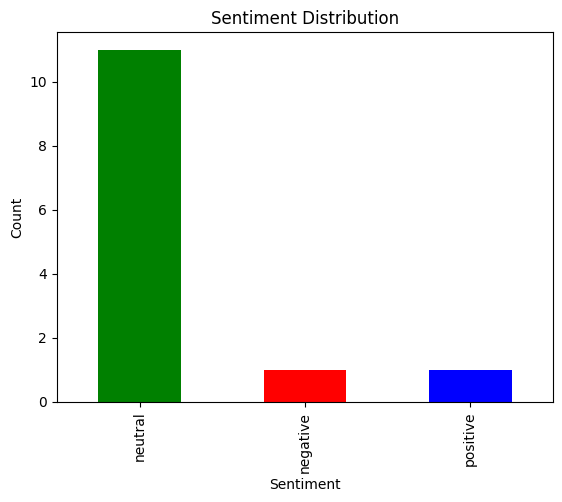

In [35]:
# Initialization of the sentiment analyzer
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

# Classify sentiment
def classify_sentiment(text):
    if not text:
        return 'neutral'
    blob = tb(text)
    polarity = blob.sentiment[0]
    print("Polarity: ", polarity)
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'


# Apply sentiment analysis
filtered_data_dashboard['Sentiment'] = filtered_data_dashboard['Si autres raison préciser'].apply(classify_sentiment)

# Display the sentiment counts
sentiment_counts = filtered_data_dashboard['Sentiment'].value_counts()
print(sentiment_counts)

# Visualization
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [36]:
filtered_data_dashboard

Arrondissement de résidence Date de remplissage de la fiche  \
1409                    Douala 5             2019-11-21 00:00:00   
1650                    Douala 3             2019-09-27 00:00:00   
1695                    Douala 2             2019-06-28 00:00:00   
1727       Douala (Non précisé )             2019-09-11 00:00:00   
1756                       R A S             2019-09-16 00:00:00   
1775                    Douala 3             2019-10-16 00:00:00   
1776       Douala (Non précisé )             2019-10-23 00:00:00   
1812                    Douala 3             2019-08-13 00:00:00   
1823                    Douala 1             2015-12-26 00:00:00   
1840                    Douala 5             2019-12-23 00:00:00   
1851       Douala (Non précisé )             2019-12-06 00:00:00   
1859                    Douala 2             2019-10-29 00:00:00   
1896                    Douala 3             2019-05-17 00:00:00   

                              Si autres raison préciser Sentiment  
1409                                        Mal de nerf  negative  
1650                                physiquement amorti   neutral  
1695          maladie chronique, suivi medical regulier  positive  
1727  ANGINE DE LA POITRINE ,ARTÉRITE , INFARCTUS DU...   neutral  
1756                                  EU UNE ENDOSCOPIE   neutral  
1775                                           MENOPOSÉ   neutral  
1776                             Consommation de drogue   neutral  
1812                             Consommation de drogue   neutral  
1823                                 Aucune information   neutral  
1840                                 Aucune information   neutral  
1851                                  EU UNE ENDOSCOPIE   neutral  
1859                             TRAITE PAR ACUPUNCTURE   neutral  
1896                             TRAITE PAR ACUPUNCTURE   neutral

<Figure size 1500x600 with 0 Axes>

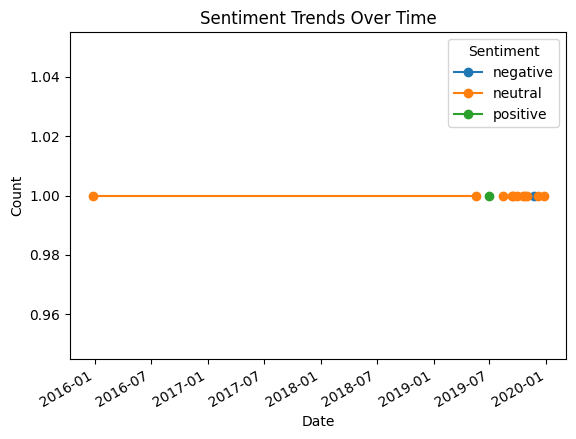

In [37]:
plt.figure(figsize=(15, 6))
# Group by date and sentiment
sentiment_trends = filtered_data_dashboard.groupby(['Date de remplissage de la fiche', 'Sentiment']).size().unstack()#.fillna(0)

# Plot sentiment trends over time
sentiment_trends.plot(kind='line', marker='o')
plt.title('Sentiment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

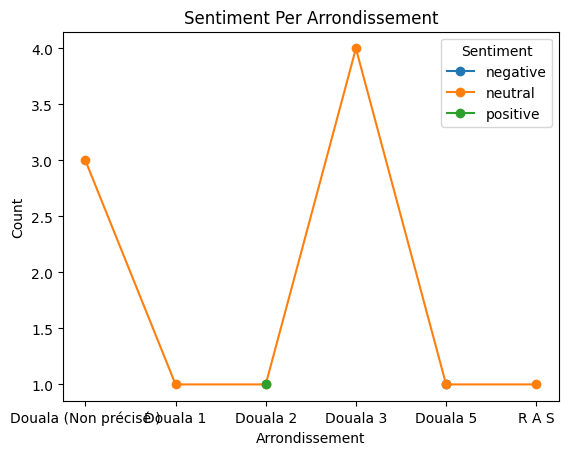

In [38]:

# Group by date and sentiment
sentiment_trends = filtered_data_dashboard.groupby(['Arrondissement de résidence', 'Sentiment']).size().unstack()#.fillna(0)

# Plot sentiment trends over time
sentiment_trends.plot(kind='line', marker='o')
plt.title('Sentiment Per Arrondissement')
plt.xlabel('Arrondissement')
plt.ylabel('Count')
plt.show()

# STOP

In [212]:
data['Autre_raisons,__preciser_'].value_counts()

Autre_raisons,__preciser_
Rapport non protégé et changement de partenaire        1
Aucune                                                 1
RAISON NON PRECISEE                                    1
A été transfusé                                        1
Prise d’un médicament « DICLOJENAC »                   1
PAS DE RAISON SPECIFIQUES                              1
RAPPORT NON PROTEGER                                   1
RAPPORT NON PROTEGE                                    1
maladie cardio vasculaire                              1
Consommation de drogue                                 1
Eu à consommer de la cocaïne et d autre drogues        1
Changé de partenaire et eu des rapports non protégé    1
RAS                                                    1
RAPPORTS NON PROTEGES                                  1
CONSOMMATION DE DROGUES                                1
Name: count, dtype: int64

In [21]:
data['Date_de_dernières_règles_(DDR)__'].value_counts()

Date_de_dernières_règles_(DDR)__
00:00.0    37
Name: count, dtype: int64

In [22]:
data.columns

Index(['ID', 'Age', 'Horodateur', 'Niveau_d'etude', 'Genre_', 'Taille_',
       'Poids', 'Situation_Matrimoniale_(SM)', 'Profession_',
       'Arrondissement_de_résidence_', 'Quartier_de_Résidence_',
       'Nationalité_', 'Religion_', 'A-t-il_(elle)_déjà_donné_le_sang_',
       'Si_oui_preciser_la_date_du_dernier_don._', 'Taux_d’hémoglobine_',
       'ÉLIGIBILITÉ_AU_DON.',
       'Raison_indisponibilité__[Est_sous_anti-biothérapie__]',
       'Raison_indisponibilité__[Taux_d’hémoglobine_bas_]',
       'Raison_indisponibilité__[date_de_dernier_Don_<_3_mois_]',
       'Raison_indisponibilité__[IST_récente_(Exclu_VIH,_Hbs,_Hcv)]',
       'Date_de_dernières_règles_(DDR)__',
       'Raison_de_l’indisponibilité_de_la_femme_[La_DDR_est_mauvais_si_<14_jour_avant_le_don]',
       'Raison_de_l’indisponibilité_de_la_femme_[Allaitement_]',
       'Raison_de_l’indisponibilité_de_la_femme_[A_accoucher_ces_6_derniers_mois__]',
       'Raison_de_l’indisponibilité_de_la_femme_[Interruption_de_grossess

In [23]:
non_empty_autre_raisons = data[data['Autre_raisons,__preciser_'].notna()]

non_empty_autre_raisons

ID  Age Horodateur Niveau_d'etude Genre_  Taille_  Poids  \
27    DONOR_1869   26    13:06.2     Secondaire  Homme      NaN    NaN   
276   DONOR_2118   21    11:52.5     Secondaire  Femme      NaN    NaN   
365   DONOR_2207   19    50:47.8    Pas Précisé  Homme      NaN    NaN   
473   DONOR_2315   28    23:58.6     Secondaire  Homme      NaN    NaN   
562   DONOR_2404   31    59:29.4  Universitaire  Homme      NaN    NaN   
745   DONOR_2587   25    44:37.2  Universitaire  Homme      NaN    NaN   
1042  DONOR_2884   19    19:18.0  Universitaire  Femme      NaN    NaN   
1045  DONOR_2887   26    04:00.1  Universitaire  Homme      NaN    NaN   
1087  DONOR_2929   23    26:10.7       Primaire  Homme      NaN    NaN   
1088  DONOR_2930   23    48:35.6    Pas Précisé  Homme      NaN    NaN   
1133  DONOR_2975   27    49:21.2     Secondaire  Homme      NaN    NaN   
1194  DONOR_3036   38    08:02.1    Pas Précisé  Homme      NaN    NaN   
1259  DONOR_3101   19    14:57.7    Pas Précisé  Homme      NaN    NaN   
1275  DONOR_3117   50    05:38.9     Secondaire  Homme      NaN   64.0   
1394  DONOR_3236   30    36:51.8    Pas Précisé  Homme    173.0    NaN   

     Situation_Matrimoniale_(SM)           Profession_  \
27                   Célibataire           Sans emploi   
276                  Célibataire            Assistante   
365                  Célibataire                 Maçon   
473                  Célibataire           Sans emploi   
562                  Célibataire           Sans emploi   
745                  Célibataire              Étudiant   
1042                 Célibataire              Étudiant   
1045                 Célibataire               Peintre   
1087                 Célibataire              Manœuvre   
1088                 Célibataire           Sans emploi   
1133                   Marié (e)                 Maçon   
1194                   Marié (e)  Déclarant en douane    
1259                 Célibataire                 Maçon   
1275                   Marié (e)           Électricien   
1394                 Célibataire             Chauffeur   

     Arrondissement_de_résidence_  ...  \
27                         Douala  ...   
276                      Douala 5  ...   
365                        Douala  ...   
473                        Douala  ...   
562                      Douala 3  ...   
745                        Douala  ...   
1042                       Douala  ...   
1045                       Douala  ...   
1087                     Douala 3  ...   
1088                       Douala  ...   
1133                     Douala 3  ...   
1194                     Douala 2  ...   
1259                       Douala  ...   
1275                       Douala  ...   
1394                       Douala  ...   

     Raison_de_non-eligibilité_totale__[Porteur(HIV,hbs,hcv)]  \
27                                                  NaN         
276                                                 NaN         
365                                                 NaN         
473                                                 NaN         
562                                                 NaN         
745                                                 NaN         
1042                                                NaN         
1045                                                NaN         
1087                                                NaN         
1088                                                NaN         
1133                                                NaN         
1194                                                NaN         
1259                                                NaN         
1275                                                NaN         
1394                                                NaN         

     Raison_de_non-eligibilité_totale__[Opéré]  \
27                                         NaN   
276                                        NaN   
365                                 

In [24]:
non_empty_autre_raisons['ÉLIGIBILITÉ_AU_DON.']

27      Temporairement Non-eligible
276     Temporairement Non-eligible
365     Temporairement Non-eligible
473     Temporairement Non-eligible
562     Temporairement Non-eligible
745     Temporairement Non-eligible
1042    Temporairement Non-eligible
1045    Temporairement Non-eligible
1087    Temporairement Non-eligible
1088    Temporairement Non-eligible
1133    Temporairement Non-eligible
1194    Temporairement Non-eligible
1259    Temporairement Non-eligible
1275    Temporairement Non-eligible
1394    Temporairement Non-eligible
Name: ÉLIGIBILITÉ_AU_DON., dtype: object

In [25]:
data['Sélectionner_"ok"_pour_envoyer_'].value_counts()

Sélectionner_"ok"_pour_envoyer_
Ok    197
Name: count, dtype: int64

In [320]:
# Replace values in 'Si_autres_raison_préciser_'
data['Si_autres_raison_préciser_'] = data['Si_autres_raison_préciser_'].replace({
    'EU UNE ENDOSCOPIE ( FIBROSCOPIE,  GASTROSCOPIE, COLOSCOPIE .......)': 'EU UNE ENDOSCOPIE',
    'DROGUES': 'Consommation de drogue',
    'PAS D INFORMATION SUR SON DOSSIER': 'Aucune information',
    'ETE TRAITE PAR ACUPUNCTURE': 'TRAITE PAR ACUPUNCTURE'
})

# Replace values in 'Autre_raisons,__preciser_'
data['Autre_raisons,__preciser_'] = data['Autre_raisons,__preciser_'].replace({
    'RAISON NON PRECISEE': 'Aucune',
    'RAS': 'Aucune',
    'PAS DE RAISON SPECIFIQUES': 'Aucune',
    'Rapport non protégé et changement de partenaire': 'Rapport non protege',
    'RAPPORT NON PROTEGER': 'Rapport non protege',
    'RAPPORT NON PROTEGE': 'Rapport non protege',
    'RAPPORTS NON PROTEGES': 'Rapport non protege',
    'Changé de partenaire et eu des rapports non protégé': 'Rapport non protege',
    'CONSOMMATION DE DROGUES': 'Consommation de drogue',
    'Eu à consommer de la cocaïne et d autre drogues': 'Consommation de drogue'
})

# Drop the specified columns
data.drop(columns=['ID', 'Horodateur', 'Sélectionner_"ok"_pour_envoyer_', 'Date_de_dernières_règles_(DDR)__'], inplace=True)

# Convert 'Si_oui_preciser_la_date_du_dernier_don._' to datetime and extract year, month, week, day
data['Si_oui_preciser_la_date_du_dernier_don._'] = pd.to_datetime(data['Si_oui_preciser_la_date_du_dernier_don._'], errors='coerce')
data['Year'] = data['Si_oui_preciser_la_date_du_dernier_don._'].dt.year
data['Month'] = data['Si_oui_preciser_la_date_du_dernier_don._'].dt.month
data['Week'] = data['Si_oui_preciser_la_date_du_dernier_don._'].dt.isocalendar().week
data['Day'] = data['Si_oui_preciser_la_date_du_dernier_don._'].dt.day


data.drop(columns=['Si_oui_preciser_la_date_du_dernier_don._'], inplace=True)

# Replace ',' with '.' for decimal consistency
data['Taux_d’hémoglobine_'] = data['Taux_d’hémoglobine_'].astype(str).str.replace(',', '.')

# Remove non-numeric characters (e.g., 'g/dl')
data['Taux_d’hémoglobine_'] = data['Taux_d’hémoglobine_'].str.extract(r'([\d\.]+)')

data['Year'] = data['Year'].astype(float)
data['Month'] = data['Month'].astype(float)
data['Week'] = data['Week'].astype(float)
data['Day'] = data['Day'].astype(float)
data['Taux_d’hémoglobine_'] = data['Taux_d’hémoglobine_'].astype(float)

cols = ['Raison_indisponibilité__[Est_sous_anti-biothérapie__]',
       'Raison_indisponibilité__[Taux_d’hémoglobine_bas_]',
       'Raison_indisponibilité__[date_de_dernier_Don_<_3_mois_]',
       'Raison_indisponibilité__[IST_récente_(Exclu_VIH,_Hbs,_Hcv)]',
       'Raison_de_l’indisponibilité_de_la_femme_[La_DDR_est_mauvais_si_<14_jour_avant_le_don]',
       'Raison_de_l’indisponibilité_de_la_femme_[Allaitement_]',
       'Raison_de_l’indisponibilité_de_la_femme_[A_accoucher_ces_6_derniers_mois__]',
       'Raison_de_l’indisponibilité_de_la_femme_[Interruption_de_grossesse__ces_06_derniers_mois]',
       'Raison_de_l’indisponibilité_de_la_femme_[est_enceinte_]',
       'Autre_raisons,__preciser_', 'Si_autres_raison_préciser_']

data = data.astype({col: 'str' for col in cols})



data.to_csv('preprocessed_data.csv', index=False)

In [27]:
data

Age Niveau_d'etude Genre_  Taille_  Poids Situation_Matrimoniale_(SM)  \
0      24  Universitaire  Homme      NaN    NaN                 Célibataire   
1      23  Universitaire  Homme      NaN    NaN                 Célibataire   
2      41    Pas Précisé  Homme      NaN    NaN                   Marié (e)   
3      24  Universitaire  Homme      NaN    NaN                 Célibataire   
4      30     Secondaire  Homme      NaN    NaN                 Célibataire   
...   ...            ...    ...      ...    ...                         ...   
1841   26     Secondaire  Homme      NaN    NaN                 Célibataire   
1842   23     Secondaire  Homme      NaN    NaN                 Célibataire   
1843   30  Universitaire  Homme      NaN    NaN                 Célibataire   
1844   28    Pas Précisé  Femme      NaN   96.0                 Célibataire   
1845   29    Pas Précisé  Homme      NaN    NaN                 Célibataire   

               Profession_ Arrondissement_de_résidence_  \
0                 Étudiant                     Douala 3   
1              Sans emploi                  Pas précisé   
2                Tailleur                      Douala 1   
3                 Étudiant                     Douala 5   
4                Militaire                       Douala   
...                    ...                          ...   
1841                 Élève                     Douala 3   
1842                 Élève                       Douala   
1843  Technicien supérieur                       Douala   
1844           Esthéticien                       Douala   
1845           Électricien                     Douala 3   

     Quartier_de_Résidence_  Nationalité_  ...  \
0                     Yassa  Camerounaise  ...   
1               Pas précisé   Pas précisé  ...   
2                  New Bell  Camerounaise  ...   
3              Ange Raphael  Camerounaise  ...   
4                     Beedi  Camerounaise  ...   
...                     ...           ...  ...   
1841               Ndogbong  Camerounaise  ...   
1842                   PK14  Camerounaise  ...   
1843      Cité des Palmiers  Camerounaise  ...   
1844                 Douala  Camerounaise  ...   
1845             PK16 NSAPÉ  Camerounaise  ...   

     Raison_de_non-eligibilité_totale__[Hypertendus]  \
0                                                NaN   
1                                                Non   
2                                                Non   
3                                                NaN   
4                                                NaN   
...                                              ...   
1841                                             NaN   
1842                                             NaN   
1843                                             NaN   
1844                                             NaN   
1845                                             NaN   

     Raison_de_non-eligibilité_totale__[Asthmatiques]  \
0                                                 NaN   
1                                                 Non   
2                                                 Non   
3                                                 NaN   
4                                                 NaN   
...                                               ...   
1841                                              NaN   
1842                                              NaN   
1843                                              NaN   
1844                                              NaN   
1845                                              NaN   

     Raison_de_non-eligibilité_totale__[Cardiaque]  \
0                                              NaN   
1                                              Non   
2                                              Non   
3                                              NaN   
4                                              NaN   
...                                            ...   
1841       

In [351]:
# Separate inputs and output
X = data.drop(columns=['ÉLIGIBILITÉ_AU_DON.'])
y = data['ÉLIGIBILITÉ_AU_DON.']

In [352]:
categorical_cols = X.select_dtypes(include=['object']).columns
categorical_cols

Index(['Niveau_d'etude', 'Genre_', 'Situation_Matrimoniale_(SM)',
       'Profession_', 'Arrondissement_de_résidence_', 'Quartier_de_Résidence_',
       'Nationalité_', 'Religion_', 'A-t-il_(elle)_déjà_donné_le_sang_',
       'Raison_indisponibilité__[Est_sous_anti-biothérapie__]',
       'Raison_indisponibilité__[Taux_d’hémoglobine_bas_]',
       'Raison_indisponibilité__[date_de_dernier_Don_<_3_mois_]',
       'Raison_indisponibilité__[IST_récente_(Exclu_VIH,_Hbs,_Hcv)]',
       'Raison_de_l’indisponibilité_de_la_femme_[La_DDR_est_mauvais_si_<14_jour_avant_le_don]',
       'Raison_de_l’indisponibilité_de_la_femme_[Allaitement_]',
       'Raison_de_l’indisponibilité_de_la_femme_[A_accoucher_ces_6_derniers_mois__]',
       'Raison_de_l’indisponibilité_de_la_femme_[Interruption_de_grossesse__ces_06_derniers_mois]',
       'Raison_de_l’indisponibilité_de_la_femme_[est_enceinte_]',
       'Autre_raisons,__preciser_',
       'Raison_de_non-eligibilité_totale__[Antécédent_de_transfusion]',


In [353]:
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
numeric_cols

Index(['Age', 'Taille_', 'Poids', 'Taux_d’hémoglobine_', 'Year', 'Month',
       'Week', 'Day'],
      dtype='object')

In [354]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
import optuna

In [355]:
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numerical_transformer, numerical_cols)
    ],
    remainder='passthrough'
)

In [356]:
y.value_counts()

ÉLIGIBILITÉ_AU_DON.
Eligible                       1571
Temporairement Non-eligible     197
Définitivement non-eligible      78
Name: count, dtype: int64

In [357]:
# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [358]:
y

array([1, 0, 0, ..., 1, 1, 1])

In [ ]:
# Define the objective function for Optuna
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5),
        'scale_pos_weight': 4,
        'random_state': 2018,
        'verbosity': 0,
        "silent": 1,
        'objective': 'multi:softmax',  
        'num_class': 3  
    }
    
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', XGBClassifier(**param, use_label_encoder=False, eval_metric='mlogloss'))
    ])
    
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=skf, scoring='f1_weighted')  
    return scores.mean()

In [39]:
# Optimize hyperparameters using Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=500)

[I 2025-03-20 21:56:21,665] A new study created in memory with name: no-name-f60cee62-6488-48f4-b456-c062765ad234
c:\Users\umroot\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:702: FutureWarning: The output of the 'remainder' transformer for column 'Week' has dtype UInt32 and uses pandas.NA to represent null values. Storing this output in a numpy array can cause errors in downstream scikit-learn estimators, and inefficiencies. Starting with scikit-learn version 1.6, this will raise a ValueError. To avoid this problem you can (i) store the output in a pandas DataFrame by using ColumnTransformer.set_output(transform='pandas') or (ii) modify the input data or the 'remainder' transformer to avoid the presence of pandas.NA (for example by using pandas.DataFrame.astype).
  warnings.warn(
c:\Users\umroot\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:702: FutureWarning: The output of the 'remainder' transformer for column 'Week' has dtype UInt32 and us

In [40]:
# Best hyperparameters multi-class
print('Best hyperparameters: ', study.best_params)

Best hyperparameters:  {'n_estimators': 141, 'max_depth': 7, 'learning_rate': 0.27961974745824497, 'subsample': 0.8238885878088886, 'colsample_bytree': 0.8100229723755945, 'gamma': 0.2896805464731108, 'reg_alpha': 0.9637458082318096, 'reg_lambda': 0.6717791469966395}


In [41]:
best_params = study.best_params

In [42]:
best_params.update({
    "silent": 1,
    'scale_pos_weight': 4,
    'random_state': 2018,
    'verbosity': 0,
    'objective': 'multi:softmax', 
    'num_class': 3  
})

In [43]:
#multi
best_params

{'n_estimators': 141,
 'max_depth': 7,
 'learning_rate': 0.27961974745824497,
 'subsample': 0.8238885878088886,
 'colsample_bytree': 0.8100229723755945,
 'gamma': 0.2896805464731108,
 'reg_alpha': 0.9637458082318096,
 'reg_lambda': 0.6717791469966395,
 'silent': 1,
 'scale_pos_weight': 4,
 'random_state': 2018,
 'verbosity': 0,
 'objective': 'multi:softmax',
 'num_class': 3}

In [45]:
from sklearn.metrics import f1_score
import numpy as np

In [359]:
X_p = preprocessor.fit_transform(X)

In [360]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['Niveau_d'etude', 'Genre_', 'Situation_Matrimoniale_(SM)',
       'Profession_', 'Arrondissement_de_résidence_', 'Quartier_de_Résidence_',
       'Nationalité_', 'R...
       'Raison_de_non-eligibilité_totale__[Cardiaque]',
       'Raison_de_non-eligibilité_totale__[Tatoué]',
       'Raison_de_non-eligibilité_totale__[Scarifié]',
       'Si_autres_raison_préciser_'],
      dtype='object')),
                                ('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant'))]),
                                 Index(['Age', 'Taille_', 'Poids', 'Taux_d’hémoglobine_', 'Year', 'Month',
       'Week', 'Day'],
      dtype='object'))])

In [381]:
from sklearn.metrics import classification_report

In [382]:
# Cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
models = []
f1_s = []

for fold, (train_idx, valid_idx) in enumerate(cv.split(X_p, y)):
    X_train, X_valid = X_p[train_idx], X_p[valid_idx]
    y_train, y_valid = y[train_idx], y[valid_idx]
    
    #model = lgb.LGBMClassifier(**best_params)
    model = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='mlogloss')
    #Pipeline(steps=[
    #('preprocessor', preprocessor),
    #('classifier', XGBClassifier(**best_params, use_label_encoder=False, eval_metric='mlogloss'))
    #])
    #print(model)
    model.fit(
        X_train, y_train,
        #eval_set=[(X_valid, y_valid)],
        #eval_metric='auc',
        #callbacks=[lgb.early_stopping(50, verbose=False)],
        #categorical_feature=categorical_features,
    )
    print("x_valid shape :", X_valid.shape)
    y_pred = model.predict_proba(X_valid)[:, 1]
    y_pred_f1 = model.predict(X_valid)[:]
    score = f1_score(y_valid, y_pred_f1, average='weighted')
    print(classification_report(y_valid, y_pred_f1, target_names=label_encoder.classes_))
    #tn, fp, fn, tp = compute_confusion_matrix(y_valid, y_pred_acc)
    #acc = compute_accuracy(tn, fp, fn, tp)
    f1_s.append(score)
    models.append(model)
    
    print(f'Fold {fold + 1} F1 Score: {score:.4f}\n')


print(f'Mean F1 score: {np.mean(f1_s):.4f}')

x_valid shape : (185, 812)
                             precision    recall  f1-score   support

Définitivement non-eligible       1.00      1.00      1.00         7
                   Eligible       1.00      1.00      1.00       158
Temporairement Non-eligible       1.00      1.00      1.00        20

                   accuracy                           1.00       185
                  macro avg       1.00      1.00      1.00       185
               weighted avg       1.00      1.00      1.00       185

Fold 1 F1 Score: 1.0000

x_valid shape : (185, 812)
                             precision    recall  f1-score   support

Définitivement non-eligible       1.00      1.00      1.00         8
                   Eligible       1.00      1.00      1.00       157
Temporairement Non-eligible       1.00      1.00      1.00        20

                   accuracy                           1.00       185
                  macro avg       1.00      1.00      1.00       185
               weig

In [383]:
label_encoder.inverse_transform([0])

array(['Définitivement non-eligible'], dtype=object)

In [384]:
label_encoder.inverse_transform([1])

array(['Eligible'], dtype=object)

In [362]:
models

[XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.8100229723755945, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric='mlogloss', feature_types=None,
               gamma=0.2896805464731108, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.27961974745824497,
               max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=7, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=141, n_jobs=None, num_class=3,
               num_parallel_tree=None, ...),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.8100229723755945, 

In [363]:
model = models[0]

In [364]:
preprocessor.fit_transform(X)

<1846x812 sparse matrix of type '<class 'numpy.float64'>'
	with 61458 stored elements in Compressed Sparse Row format>

In [365]:
import joblib

# Save model
joblib.dump({'model': models[0], 'label_encoder': label_encoder, 'preprocessor': preprocessor}, 'model_pipeline.pkl')

['model_pipeline.pkl']

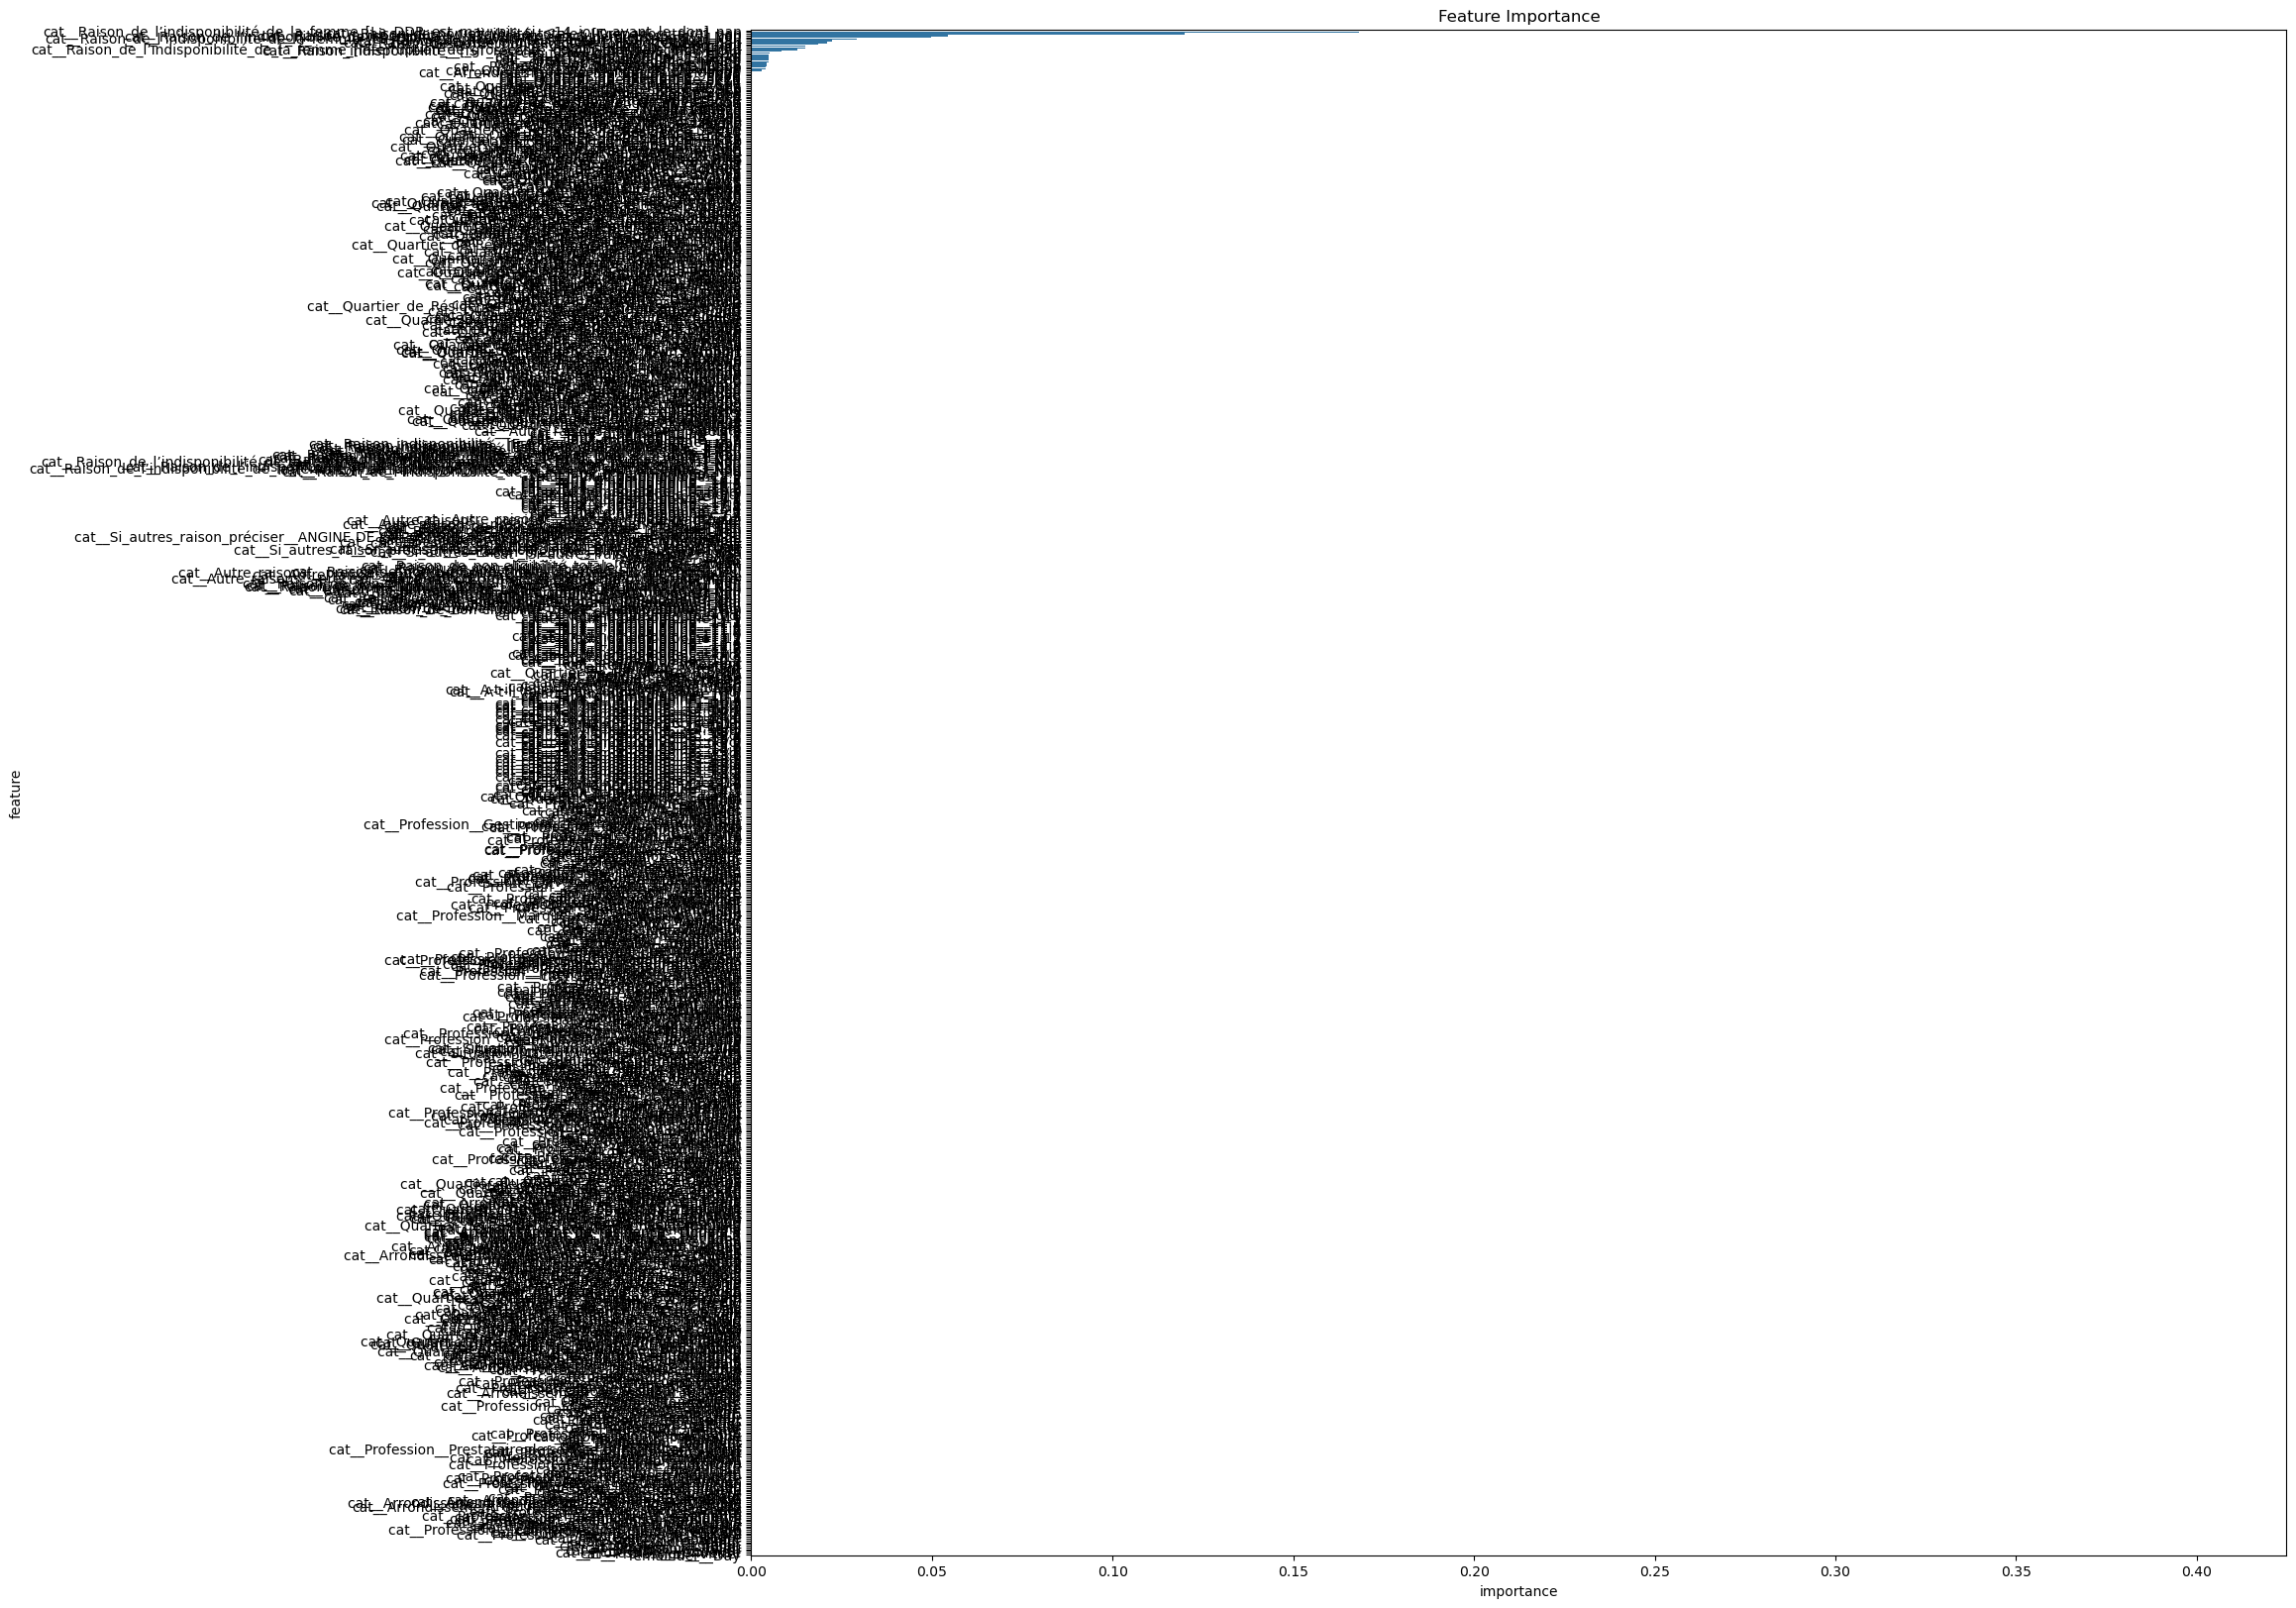

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming 'models' is a list of trained pipelines
model = models[0]

# Access the XGBClassifier from the pipeline
classifier = model.named_steps['classifier']

# Get feature names after one-hot encoding
feature_names = model.named_steps['preprocessor'].get_feature_names_out()

# Get feature importances
importances = classifier.feature_importances_

# Align feature importances with feature names
if len(feature_names) != len(importances):
    # Trim or pad the importances to match the length of feature names
    min_length = min(len(feature_names), len(importances))
    feature_names = feature_names[:min_length]
    importances = importances[:min_length]

feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

# Plot feature importance
plt.figure(figsize=(20, 20))
sns.barplot(data=feature_importance_df.sort_values(by='importance', ascending=False), x='importance', y='feature')
plt.title('Feature Importance')
plt.show()

In [53]:
feature_importance_df_sorted = feature_importance_df.sort_values(by = ['importance'], ascending = False)
feature_importance_df_sorted

feature  importance
807  cat__Raison_de_l’indisponibilité_de_la_femme_[...    0.404582
837  cat__Raison_de_non-eligibilité_totale__[Drepan...    0.168159
804  cat__Raison_indisponibilité__[IST_récente_(Exc...    0.119971
810  cat__Raison_de_l’indisponibilité_de_la_femme_[...    0.054320
806  cat__Raison_de_l’indisponibilité_de_la_femme_[...    0.049653
..                                                 ...         ...
296                           cat__Profession__Tôlier     0.000000
297                           cat__Profession__Vendeur    0.000000
298                          cat__Profession__Vendeuse    0.000000
299                           cat__Profession__Vitrier    0.000000
873                                     remainder__Day    0.000000

[874 rows x 2 columns]

In [263]:
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Niveau_d'etude', 'Genre_', 'Situation_Matrimoniale_(SM)',
       'Profession_', 'Arrondissement_de_résidence_', 'Quartier_...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.27961974745824497, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=7,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=141,
                               n_jobs=None, num_class=3, num_parallel_tree=None, ...))])

In [54]:
classifier

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8100229723755945, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', feature_types=None,
              gamma=0.2896805464731108, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.27961974745824497,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=141, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

In [ ]:
import joblib

loaded_model = joblib.load('model_pipeline.pkl')

classifier = loaded_model.named_steps['classifier']

processor = loaded_model.named_steps['preprocessor']

In [179]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['Niveau_d'etude', 'Genre_', 'Situation_Matrimoniale_(SM)',
       'Profession_', 'Arrondissement_de_résidence_', 'Quartier_de_Résidence_',
       'Nationalité_', 'R...
       'Raison_de_non-eligibilité_totale__[Asthmatiques]',
       'Raison_de_non-eligibilité_totale__[Cardiaque]',
       'Raison_de_non-eligibilité_totale__[Tatoué]',
       'Raison_de_non-eligibilité_totale__[Scarifié]',
       'Si_autres_raison_préciser_'],
      dtype='object')),
                                ('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 Index(['Age', 'Taille_', 'Poids', 'Year', 'Month', 'Day'], dtype='object'))])

In [178]:
processor = model.named_steps['preprocessor']
processor

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['Niveau_d'etude', 'Genre_', 'Situation_Matrimoniale_(SM)',
       'Profession_', 'Arrondissement_de_résidence_', 'Quartier_de_Résidence_',
       'Nationalité_', 'R...
       'Raison_de_non-eligibilité_totale__[Asthmatiques]',
       'Raison_de_non-eligibilité_totale__[Cardiaque]',
       'Raison_de_non-eligibilité_totale__[Tatoué]',
       'Raison_de_non-eligibilité_totale__[Scarifié]',
       'Si_autres_raison_préciser_'],
      dtype='object')),
                                ('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 Index(['Age', 'Taille_', 'Poids', 'Year', 'Month', 'Day'], dtype='object'))])

In [299]:
def preprocessing_data(df):

    df["Niveau_d'etude"] = standardize_column_values(df, "Niveau_d'etude", {
    'Aucun': 'Pas Précisé'
    })

    df['Profession_'] = standardize_column_values(df, 'Profession_', professions_mapping)

    df['Arrondissement_de_résidence_'] = standardize_column_values(df, 'Arrondissement_de_résidence_', arrondissements_mapping)

    df['Quartier_de_Résidence_'] = standardize_column_values(df, 'Quartier_de_Résidence_', quarterrs_mapping)

    df['Religion_'] = standardize_column_values(df, 'Religion_', religion_mapping)

    df['Nationalité_'] = standardize_column_values(df, 'Nationalité_', nationality_mapping)




    # Replace values in 'Si_autres_raison_préciser_'
    data['Si_autres_raison_préciser_'] = data['Si_autres_raison_préciser_'].replace({
        'EU UNE ENDOSCOPIE ( FIBROSCOPIE,  GASTROSCOPIE, COLOSCOPIE .......)': 'EU UNE ENDOSCOPIE',
        'DROGUES': 'Consommation de drogue',
        'PAS D INFORMATION SUR SON DOSSIER': 'Aucune information',
        'ETE TRAITE PAR ACUPUNCTURE': 'TRAITE PAR ACUPUNCTURE'
    })

    # Replace values in 'Autre_raisons,__preciser_'
    data['Autre_raisons,__preciser_'] = data['Autre_raisons,__preciser_'].replace({
        'RAISON NON PRECISEE': 'Aucune',
        'RAS': 'Aucune',
        'PAS DE RAISON SPECIFIQUES': 'Aucune',
        'Rapport non protégé et changement de partenaire': 'Rapport non protege',
        'RAPPORT NON PROTEGER': 'Rapport non protege',
        'RAPPORT NON PROTEGE': 'Rapport non protege',
        'RAPPORTS NON PROTEGES': 'Rapport non protege',
        'Changé de partenaire et eu des rapports non protégé': 'Rapport non protege',
        'CONSOMMATION DE DROGUES': 'Consommation de drogue',
        'Eu à consommer de la cocaïne et d autre drogues': 'Consommation de drogue'
    })

    # Drop the specified columns
    data.drop(columns=['ID', 'Horodateur', 'Sélectionner_"ok"_pour_envoyer_', 'Date_de_dernières_règles_(DDR)__'], inplace=True)

    # Convert 'Si_oui_preciser_la_date_du_dernier_don._' to datetime and extract year, month, week, day
    data['Si_oui_preciser_la_date_du_dernier_don._'] = pd.to_datetime(data['Si_oui_preciser_la_date_du_dernier_don._'], errors='coerce')
    data['Year'] = data['Si_oui_preciser_la_date_du_dernier_don._'].dt.year
    data['Month'] = data['Si_oui_preciser_la_date_du_dernier_don._'].dt.month
    data['Week'] = data['Si_oui_preciser_la_date_du_dernier_don._'].dt.isocalendar().week
    data['Day'] = data['Si_oui_preciser_la_date_du_dernier_don._'].dt.day


    data.drop(columns=['Si_oui_preciser_la_date_du_dernier_don._'], inplace=True)

    # Replace ',' with '.' for decimal consistency
    data['Taux_d’hémoglobine_'] = data['Taux_d’hémoglobine_'].astype(str).str.replace(',', '.')

    # Remove non-numeric characters (e.g., 'g/dl')
    data['Taux_d’hémoglobine_'] = data['Taux_d’hémoglobine_'].str.extract(r'([\d\.]+)')

    data['Year'] = data['Year'].astype(float)
    data['Month'] = data['Month'].astype(float)
    data['Week'] = data['Week'].astype(float)
    data['Day'] = data['Day'].astype(float)
    data['Taux_d’hémoglobine_'] = data['Taux_d’hémoglobine_'].astype(float)

    cols = ['Raison_indisponibilité__[Est_sous_anti-biothérapie__]',
        'Raison_indisponibilité__[Taux_d’hémoglobine_bas_]',
        'Raison_indisponibilité__[date_de_dernier_Don_<_3_mois_]',
        'Raison_indisponibilité__[IST_récente_(Exclu_VIH,_Hbs,_Hcv)]',
        'Raison_de_l’indisponibilité_de_la_femme_[La_DDR_est_mauvais_si_<14_jour_avant_le_don]',
        'Raison_de_l’indisponibilité_de_la_femme_[Allaitement_]',
        'Raison_de_l’indisponibilité_de_la_femme_[A_accoucher_ces_6_derniers_mois__]',
        'Raison_de_l’indisponibilité_de_la_femme_[Interruption_de_grossesse__ces_06_derniers_mois]',
        'Raison_de_l’indisponibilité_de_la_femme_[est_enceinte_]',
        'Autre_raisons,__preciser_', 'Si_autres_raison_préciser_']

    data = data.astype({col: 'str' for col in cols})

    # Handle missing values
    #df.fillna("Others", inplace=True)

    return df



In [366]:
json_file = {
    "ID": "DONOR_2788",
    "Age": 40,
    "Horodateur": "30:17.9",
    "Niveau_d'etude": "Primaire",
    "Genre_": "Femme",
    "Taille_": np.nan,
    "Poids": np.nan,
    "Situation_Matrimoniale_(SM)": "Marié (e)",
    "Profession_": "Ménagère",
    "Arrondissement_de_résidence_": "Douala 3",
    "Quartier_de_Résidence_": "boko",
    "Nationalité_": "Camerounaise",
    "Religion_": "Chretien (Protestant )",
    "A-t-il_(elle)_déjà_donné_le_sang_": "Oui",
    "Si_oui_preciser_la_date_du_dernier_don._": "2/5/2019 0:00",
    "Taux_d’hémoglobine_": np.nan,
    "Raison_indisponibilité__[Est_sous_anti-biothérapie__]": np.nan,
    "Raison_indisponibilité__[Taux_d’hémoglobine_bas_]": np.nan,
    "Raison_indisponibilité__[date_de_dernier_Don_<_3_mois_]": np.nan,
    "Raison_indisponibilité__[IST_récente_(Exclu_VIH,_Hbs,_Hcv)]": np.nan,
    "Date_de_dernières_règles_(DDR)__": np.nan,
    "Raison_de_l’indisponibilité_de_la_femme_[La_DDR_est_mauvais_si_<14_jour_avant_le_don]": np.nan,
    "Raison_de_l’indisponibilité_de_la_femme_[Allaitement_]": np.nan,
    "Raison_de_l’indisponibilité_de_la_femme_[A_accoucher_ces_6_derniers_mois__]": np.nan,
    "Raison_de_l’indisponibilité_de_la_femme_[Interruption_de_grossesse__ces_06_derniers_mois]": np.nan,
    "Raison_de_l’indisponibilité_de_la_femme_[est_enceinte_]": np.nan,
    "Autre_raisons,__preciser_": np.nan,
    "Sélectionner_\"ok\"_pour_envoyer_": np.nan,
    "Raison_de_non-eligibilité_totale__[Antécédent_de_transfusion]": "Non",
    "Raison_de_non-eligibilité_totale__[Porteur(HIV,hbs,hcv)]": "Non",
    "Raison_de_non-eligibilité_totale__[Opéré]": "Non",
    "Raison_de_non-eligibilité_totale__[Drepanocytaire]": "Non",
    "Raison_de_non-eligibilité_totale__[Diabétique]": "Non",
    "Raison_de_non-eligibilité_totale__[Hypertendus]": "Non",
    "Raison_de_non-eligibilité_totale__[Asthmatiques]": "Non",
    "Raison_de_non-eligibilité_totale__[Cardiaque]": "Non",
    "Raison_de_non-eligibilité_totale__[Tatoué]": "Non",
    "Raison_de_non-eligibilité_totale__[Scarifié]": "Oui",
    "Si_autres_raison_préciser_": np.nan
}

In [385]:
df = pd.DataFrame([json_file])
df

ID  Age Horodateur Niveau_d'etude Genre_  Taille_  Poids  \
0  DONOR_2788   40    30:17.9       Primaire  Femme      NaN    NaN   

  Situation_Matrimoniale_(SM) Profession_ Arrondissement_de_résidence_  ...  \
0                   Marié (e)    Ménagère                     Douala 3  ...   

  Raison_de_non-eligibilité_totale__[Porteur(HIV,hbs,hcv)]  \
0                                                Non         

  Raison_de_non-eligibilité_totale__[Opéré]  \
0                                       Non   

  Raison_de_non-eligibilité_totale__[Drepanocytaire]  \
0                                                Non   

  Raison_de_non-eligibilité_totale__[Diabétique]  \
0                                            Non   

  Raison_de_non-eligibilité_totale__[Hypertendus]  \
0                                             Non   

   Raison_de_non-eligibilité_totale__[Asthmatiques]  \
0                                               Non   

   Raison_de_non-eligibilité_totale__[Cardiaque]  \
0                                            Non   

   Raison_de_non-eligibilité_totale__[Tatoué]  \
0                                         Non   

   Raison_de_non-eligibilité_totale__[Scarifié]  Si_autres_raison_préciser_  
0                                           Oui                         NaN  

[1 rows x 39 columns]

In [386]:
df.columns

Index(['ID', 'Age', 'Horodateur', 'Niveau_d'etude', 'Genre_', 'Taille_',
       'Poids', 'Situation_Matrimoniale_(SM)', 'Profession_',
       'Arrondissement_de_résidence_', 'Quartier_de_Résidence_',
       'Nationalité_', 'Religion_', 'A-t-il_(elle)_déjà_donné_le_sang_',
       'Si_oui_preciser_la_date_du_dernier_don._', 'Taux_d’hémoglobine_',
       'Raison_indisponibilité__[Est_sous_anti-biothérapie__]',
       'Raison_indisponibilité__[Taux_d’hémoglobine_bas_]',
       'Raison_indisponibilité__[date_de_dernier_Don_<_3_mois_]',
       'Raison_indisponibilité__[IST_récente_(Exclu_VIH,_Hbs,_Hcv)]',
       'Date_de_dernières_règles_(DDR)__',
       'Raison_de_l’indisponibilité_de_la_femme_[La_DDR_est_mauvais_si_<14_jour_avant_le_don]',
       'Raison_de_l’indisponibilité_de_la_femme_[Allaitement_]',
       'Raison_de_l’indisponibilité_de_la_femme_[A_accoucher_ces_6_derniers_mois__]',
       'Raison_de_l’indisponibilité_de_la_femme_[Interruption_de_grossesse__ces_06_derniers_mois]',
   

In [335]:
processor

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['Niveau_d'etude', 'Genre_', 'Situation_Matrimoniale_(SM)',
       'Profession_', 'Arrondissement_de_résidence_', 'Quartier_de_Résidence_',
       'Nationalité_', 'R...
       'Raison_de_non-eligibilité_totale__[Asthmatiques]',
       'Raison_de_non-eligibilité_totale__[Cardiaque]',
       'Raison_de_non-eligibilité_totale__[Tatoué]',
       'Raison_de_non-eligibilité_totale__[Scarifié]',
       'Si_autres_raison_préciser_'],
      dtype='object')),
                                ('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 Index(['Age', 'Taille_', 'Poids', 'Year', 'Month', 'Day'], dtype='object'))])

In [253]:
#X_t = preprocessor.fit_transform(X)

In [387]:
X_ = preprocessing_data(df)

In [388]:
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
numeric_cols


Index(['Age', 'Taille_', 'Poids', 'Taux_d’hémoglobine_', 'Year', 'Month',
       'Week', 'Day'],
      dtype='object')

In [371]:
X_

Age Niveau_d'etude Genre_  Taille_  Poids Situation_Matrimoniale_(SM)  \
0   40       Primaire  Femme      NaN    NaN                   Marié (e)   

  Profession_ Arrondissement_de_résidence_ Quartier_de_Résidence_  \
0    Ménagère                     Douala 3                   Boko   

   Nationalité_  ... Raison_de_non-eligibilité_totale__[Hypertendus]  \
0  Camerounaise  ...                                             Non   

  Raison_de_non-eligibilité_totale__[Asthmatiques]  \
0                                              Non   

  Raison_de_non-eligibilité_totale__[Cardiaque]  \
0                                           Non   

  Raison_de_non-eligibilité_totale__[Tatoué]  \
0                                        Non   

  Raison_de_non-eligibilité_totale__[Scarifié] Si_autres_raison_préciser_  \
0                                          Oui                        nan   

     Year Month Week  Day  
0  2019.0   2.0  6.0  5.0  

[1 rows x 38 columns]

In [372]:
numeric_cols = X_.select_dtypes(include=['float64', 'int64']).columns
numeric_cols

Index(['Age', 'Taille_', 'Poids', 'Year', 'Month', 'Week', 'Day'], dtype='object')

In [373]:
X_

Age Niveau_d'etude Genre_  Taille_  Poids Situation_Matrimoniale_(SM)  \
0   40       Primaire  Femme      NaN    NaN                   Marié (e)   

  Profession_ Arrondissement_de_résidence_ Quartier_de_Résidence_  \
0    Ménagère                     Douala 3                   Boko   

   Nationalité_  ... Raison_de_non-eligibilité_totale__[Hypertendus]  \
0  Camerounaise  ...                                             Non   

  Raison_de_non-eligibilité_totale__[Asthmatiques]  \
0                                              Non   

  Raison_de_non-eligibilité_totale__[Cardiaque]  \
0                                           Non   

  Raison_de_non-eligibilité_totale__[Tatoué]  \
0                                        Non   

  Raison_de_non-eligibilité_totale__[Scarifié] Si_autres_raison_préciser_  \
0                                          Oui                        nan   

     Year Month Week  Day  
0  2019.0   2.0  6.0  5.0  

[1 rows x 38 columns]

In [374]:
X_.columns

Index(['Age', 'Niveau_d'etude', 'Genre_', 'Taille_', 'Poids',
       'Situation_Matrimoniale_(SM)', 'Profession_',
       'Arrondissement_de_résidence_', 'Quartier_de_Résidence_',
       'Nationalité_', 'Religion_', 'A-t-il_(elle)_déjà_donné_le_sang_',
       'Taux_d’hémoglobine_',
       'Raison_indisponibilité__[Est_sous_anti-biothérapie__]',
       'Raison_indisponibilité__[Taux_d’hémoglobine_bas_]',
       'Raison_indisponibilité__[date_de_dernier_Don_<_3_mois_]',
       'Raison_indisponibilité__[IST_récente_(Exclu_VIH,_Hbs,_Hcv)]',
       'Raison_de_l’indisponibilité_de_la_femme_[La_DDR_est_mauvais_si_<14_jour_avant_le_don]',
       'Raison_de_l’indisponibilité_de_la_femme_[Allaitement_]',
       'Raison_de_l’indisponibilité_de_la_femme_[A_accoucher_ces_6_derniers_mois__]',
       'Raison_de_l’indisponibilité_de_la_femme_[Interruption_de_grossesse__ces_06_derniers_mois]',
       'Raison_de_l’indisponibilité_de_la_femme_[est_enceinte_]',
       'Autre_raisons,__preciser_',
       '

In [375]:
X_.shape

(1, 38)

In [389]:
X_encoded = preprocessor.transform(X_)
X_encoded

<1x812 sparse matrix of type '<class 'numpy.float64'>'
	with 36 stored elements in Compressed Sparse Row format>

In [390]:
X_encoded.shape

(1, 812)

In [391]:
label_encoder.classes_

array(['Définitivement non-eligible', 'Eligible',
       'Temporairement Non-eligible'], dtype=object)

In [392]:
prediction_binary = models[0].predict(X_encoded)[:]
prediction_binary

array([0])

In [394]:
label_encoder.inverse_transform(prediction_binary)

array(['Définitivement non-eligible'], dtype=object)

In [ ]:
#Eligible

{
    "ID": "DONOR_2788",
    "Age": 28,
    "Horodateur": "24:18.6",
    "Niveau_d'etude": "Universitaire",
    "Genre_": "Homme",
    "Taille_": null,
    "Poids": null,
    "Situation_Matrimoniale_(SM)": "Célibataire",
    "Profession_": "Etudiant (e)",
    "Arrondissement_de_résidence_": "Douala 3",
    "Quartier_de_Résidence_": "Ndogbon",
    "Nationalité_": "Camerounaise",
    "Religion_": "Chretien (Catholique)",
    "A-t-il_(elle)_déjà_donné_le_sang_": "Non",
    "Si_oui_preciser_la_date_du_dernier_don._": null,
    "Taux_d’hémoglobine_": null,
    "Raison_indisponibilité__[Est_sous_anti-biothérapie__]": null,
    "Raison_indisponibilité__[Taux_d’hémoglobine_bas_]": null,
    "Raison_indisponibilité__[date_de_dernier_Don_<_3_mois_]": null,
    "Raison_indisponibilité__[IST_récente_(Exclu_VIH,_Hbs,_Hcv)]": null,
    "Date_de_dernières_règles_(DDR)__": null,
    "Raison_de_l’indisponibilité_de_la_femme_[La_DDR_est_mauvais_si_<14_jour_avant_le_don]": null,
    "Raison_de_l’indisponibilité_de_la_femme_[Allaitement_]": null,
    "Raison_de_l’indisponibilité_de_la_femme_[A_accoucher_ces_6_derniers_mois__]": null,
    "Raison_de_l’indisponibilité_de_la_femme_[Interruption_de_grossesse__ces_06_derniers_mois]": null,
    "Raison_de_l’indisponibilité_de_la_femme_[est_enceinte_]": null,
    "Autre_raisons,__preciser_": null,
    "Sélectionner_\"ok\"_pour_envoyer_": null,
    "Raison_de_non-eligibilité_totale__[Antécédent_de_transfusion]": null,
    "Raison_de_non-eligibilité_totale__[Porteur(HIV,hbs,hcv)]": null,
    "Raison_de_non-eligibilité_totale__[Opéré]": null,
    "Raison_de_non-eligibilité_totale__[Drepanocytaire]": null,
    "Raison_de_non-eligibilité_totale__[Diabétique]": null,
    "Raison_de_non-eligibilité_totale__[Hypertendus]": null,
    "Raison_de_non-eligibilité_totale__[Asthmatiques]": null,
    "Raison_de_non-eligibilité_totale__[Cardiaque]": null,
    "Raison_de_non-eligibilité_totale__[Tatoué]": null,
    "Raison_de_non-eligibilité_totale__[Scarifié]": null,
    "Si_autres_raison_préciser_": null
}

In [ ]:
#Definitive Not eligible
{
    "ID": "DONOR_2788",
    "Age": 23,
    "Horodateur": "44:19.0",
    "Niveau_d'etude": "Universitaire",
    "Genre_": "Homme",
    "Taille_": null,
    "Poids": null,
    "Situation_Matrimoniale_(SM)": "Célibataire",
    "Profession_": "Sans Emplois",
    "Arrondissement_de_résidence_": "R A S",
    "Quartier_de_Résidence_": "R A S",
    "Nationalité_": "R A S",
    "Religion_": "Chretien (Catholique)",
    "A-t-il_(elle)_déjà_donné_le_sang_": "Oui",
    "Si_oui_preciser_la_date_du_dernier_don._": "1/1/2017 0:00",
    "Taux_d’hémoglobine_": "10.8",
    "Raison_indisponibilité__[Est_sous_anti-biothérapie__]": null,
    "Raison_indisponibilité__[Taux_d’hémoglobine_bas_]": null,
    "Raison_indisponibilité__[date_de_dernier_Don_<_3_mois_]": null,
    "Raison_indisponibilité__[IST_récente_(Exclu_VIH,_Hbs,_Hcv)]": null,
    "Date_de_dernières_règles_(DDR)__": null,
    "Raison_de_l’indisponibilité_de_la_femme_[La_DDR_est_mauvais_si_<14_jour_avant_le_don]": null,
    "Raison_de_l’indisponibilité_de_la_femme_[Allaitement_]": null,
    "Raison_de_l’indisponibilité_de_la_femme_[A_accoucher_ces_6_derniers_mois__]": null,
    "Raison_de_l’indisponibilité_de_la_femme_[Interruption_de_grossesse__ces_06_derniers_mois]": null,
    "Raison_de_l’indisponibilité_de_la_femme_[est_enceinte_]": null,
    "Autre_raisons,__preciser_": null,
    "Sélectionner_\"ok\"_pour_envoyer_": null,
    "Raison_de_non-eligibilité_totale__[Antécédent_de_transfusion]": "Non",
    "Raison_de_non-eligibilité_totale__[Porteur(HIV,hbs,hcv)]": "Non",
    "Raison_de_non-eligibilité_totale__[Opéré]": "Oui",
    "Raison_de_non-eligibilité_totale__[Drepanocytaire]": "Non",
    "Raison_de_non-eligibilité_totale__[Diabétique]": "Non",
    "Raison_de_non-eligibilité_totale__[Hypertendus]": "Non",
    "Raison_de_non-eligibilité_totale__[Asthmatiques]": "Non",
    "Raison_de_non-eligibilité_totale__[Cardiaque]": "Non",
    "Raison_de_non-eligibilité_totale__[Tatoué]": "Non",
    "Raison_de_non-eligibilité_totale__[Scarifié]": "Non",
    "Si_autres_raison_préciser_": null
}

In [395]:
label_encoder.classes_

array(['Définitivement non-eligible', 'Eligible',
       'Temporairement Non-eligible'], dtype=object)

In [ ]:
#Temporairement Non Eligible

{
    "ID": "DONOR_2788",
    "Age": 46,
    "Horodateur": "02:58.2",
    "Niveau_d'etude": "Pas Précisé",
    "Genre_": "Homme",
    "Taille_": null,
    "Poids": null,
    "Situation_Matrimoniale_(SM)": "Marié (e)",
    "Profession_": "ELECTRICIEN",
    "Arrondissement_de_résidence_": "Douala 3",
    "Quartier_de_Résidence_": "NDOGPOSSI",
    "Nationalité_": "Camerounaise",
    "Religion_": "Chretien (Catholique)",
    "A-t-il_(elle)_déjà_donné_le_sang_": "Non",
    "Si_oui_preciser_la_date_du_dernier_don._": "1/1/0001",
    "Taux_d’hémoglobine_": null,
    "Raison_indisponibilité__[Est_sous_anti-biothérapie__]": null,
    "Raison_indisponibilité__[Taux_d’hémoglobine_bas_]": "Oui",
    "Raison_indisponibilité__[date_de_dernier_Don_<_3_mois_]": null,
    "Raison_indisponibilité__[IST_récente_(Exclu_VIH,_Hbs,_Hcv)]": null,
    "Date_de_dernières_règles_(DDR)__": null,
    "Raison_de_l’indisponibilité_de_la_femme_[La_DDR_est_mauvais_si_<14_jour_avant_le_don]": null,
    "Raison_de_l’indisponibilité_de_la_femme_[Allaitement_]": null,
    "Raison_de_l’indisponibilité_de_la_femme_[A_accoucher_ces_6_derniers_mois__]": null,
    "Raison_de_l’indisponibilité_de_la_femme_[Interruption_de_grossesse__ces_06_derniers_mois]": null,
    "Raison_de_l’indisponibilité_de_la_femme_[est_enceinte_]": null,
    "Autre_raisons,__preciser_": null,
    "Sélectionner_\"ok\"_pour_envoyer_": "Ok",
    "Raison_de_non-eligibilité_totale__[Antécédent_de_transfusion]": null,
    "Raison_de_non-eligibilité_totale__[Porteur(HIV,hbs,hcv)]": null,
    "Raison_de_non-eligibilité_totale__[Opéré]": null,
    "Raison_de_non-eligibilité_totale__[Drepanocytaire]": null,
    "Raison_de_non-eligibilité_totale__[Diabétique]": null,
    "Raison_de_non-eligibilité_totale__[Hypertendus]": null,
    "Raison_de_non-eligibilité_totale__[Asthmatiques]": null,
    "Raison_de_non-eligibilité_totale__[Cardiaque]": null,
    "Raison_de_non-eligibilité_totale__[Tatoué]": null,
    "Raison_de_non-eligibilité_totale__[Scarifié]": null,
    "Si_autres_raison_préciser_": null
}

In [62]:
# Extract three samples for each category in 'ÉLIGIBILITÉ_AU_DON.'
samples_dict = {}
categories = df['ÉLIGIBILITÉ_AU_DON.'].unique()

for category in categories:
    samples = df[df['ÉLIGIBILITÉ_AU_DON.'] == category].sample(3, random_state=42)
    samples_dict[category] = samples.drop(columns=['ÉLIGIBILITÉ_AU_DON.']).to_dict(orient='records')

samples_dict

{'Eligible': [{'ID': 'DONOR_3254',
   'Age': 28,
   'Horodateur': '24:18.6',
   "Niveau_d'etude": 'Universitaire',
   'Genre_': 'Homme',
   'Taille_': nan,
   'Poids': nan,
   'Situation_Matrimoniale_(SM)': 'Célibataire',
   'Profession_': 'Etudiant (e)',
   'Arrondissement_de_résidence_': 'Douala 3',
   'Quartier_de_Résidence_': 'Ndogbon ',
   'Nationalité_': 'Camerounaise',
   'Religion_': 'Chretien (Catholique)',
   'A-t-il_(elle)_déjà_donné_le_sang_': 'Non',
   'Si_oui_preciser_la_date_du_dernier_don._': nan,
   'Taux_d’hémoglobine_': nan,
   'Raison_indisponibilité__[Est_sous_anti-biothérapie__]': nan,
   'Raison_indisponibilité__[Taux_d’hémoglobine_bas_]': nan,
   'Raison_indisponibilité__[date_de_dernier_Don_<_3_mois_]': nan,
   'Raison_indisponibilité__[IST_récente_(Exclu_VIH,_Hbs,_Hcv)]': nan,
   'Date_de_dernières_règles_(DDR)__': nan,
   'Raison_de_l’indisponibilité_de_la_femme_[La_DDR_est_mauvais_si_<14_jour_avant_le_don]': nan,
   'Raison_de_l’indisponibilité_de_la_femme_[